In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
##그래프의 결과를 출력 세션에 나타나게 하자
%matplotlib inline 
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [145]:
data = pd.read_csv('3.세종시_아파트(매매)_실거래가.csv')

### 아파트 계약년월일 기준 오름차순

In [66]:
#읍면동 구분하는 함수
def sort_dong(df):
    a=df.split(" ")
    if a[1][-1]=='동':
        return '동'
    elif a[1][-1]=='면':
        return '면'
    else :
        return '읍'
data['읍면동구분']=data['시군구'].apply(sort_dong)

In [146]:
#동 구분하는 함수
def sort_dong2(df):
    a=df.split(" ")
    return a[1]
data['읍면동']=data['시군구'].apply(sort_dong2)

In [68]:
data['읍면동'].unique()

array(['고운동', '금남면', '나성동', '도담동', '보람동', '부강면', '소담동', '아름동', '어진동',
       '연동면', '연서면', '장군면', '전동면', '전의면', '조치원읍', '종촌동', '한솔동', '소정면',
       '새롬동', '다정동', '대평동', '반곡동', '가람동'], dtype=object)

<ipython-input-149-6b9249c1dfc7>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,2.5),dpi=160)


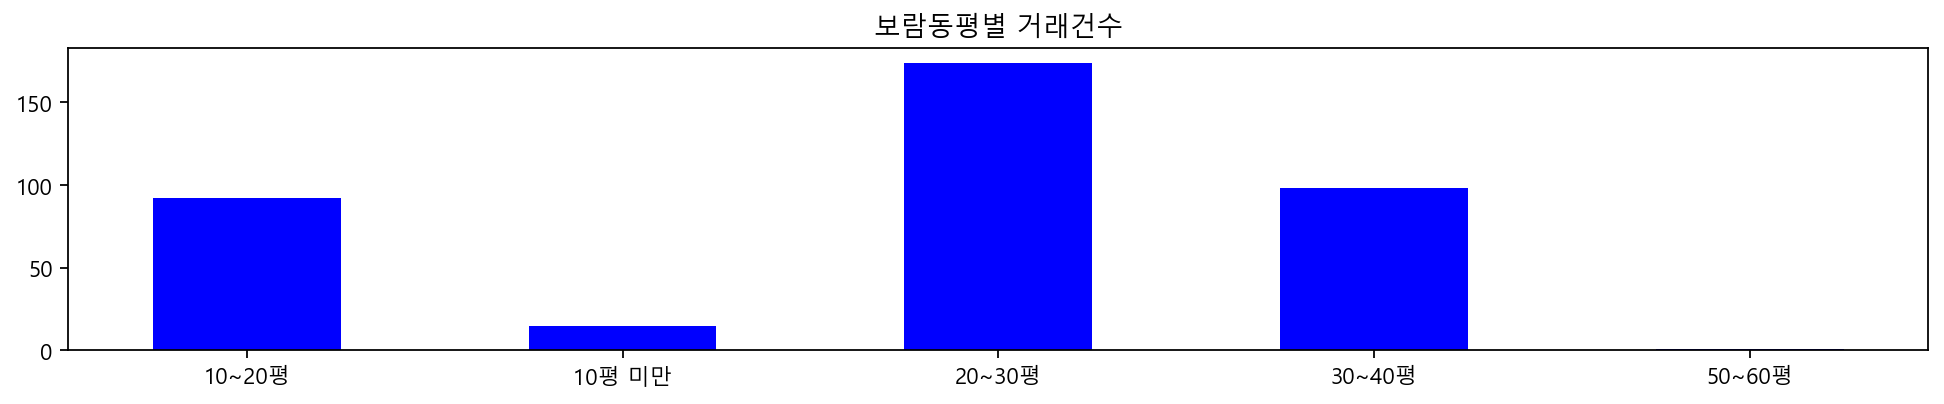

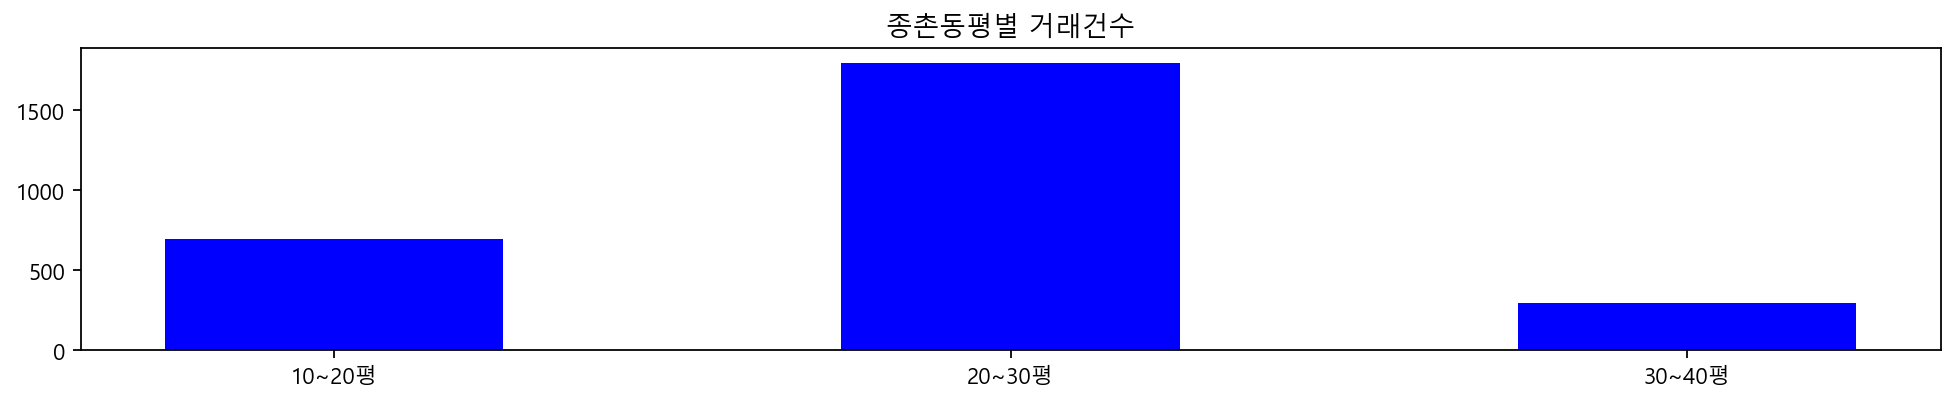

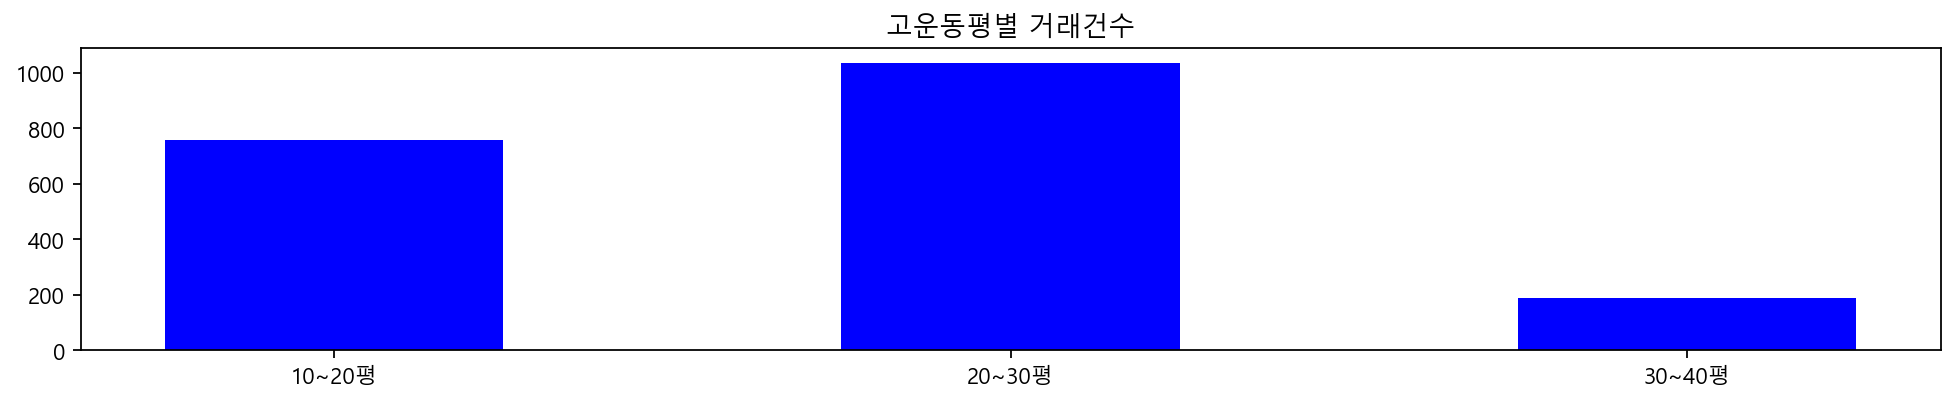

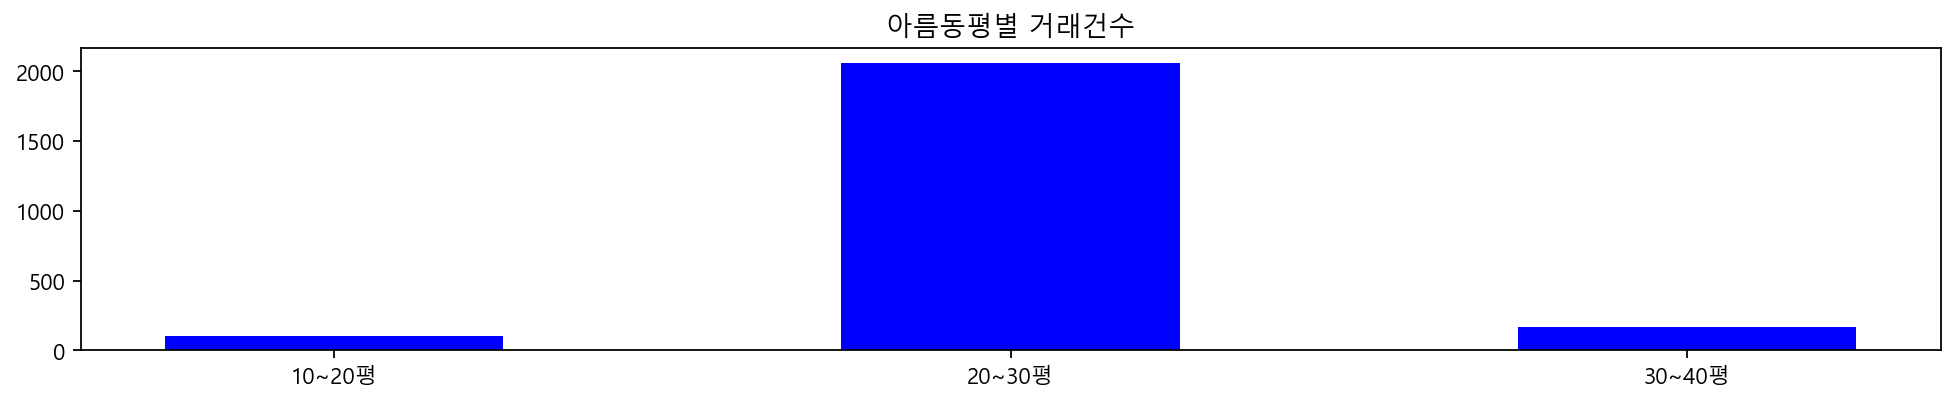

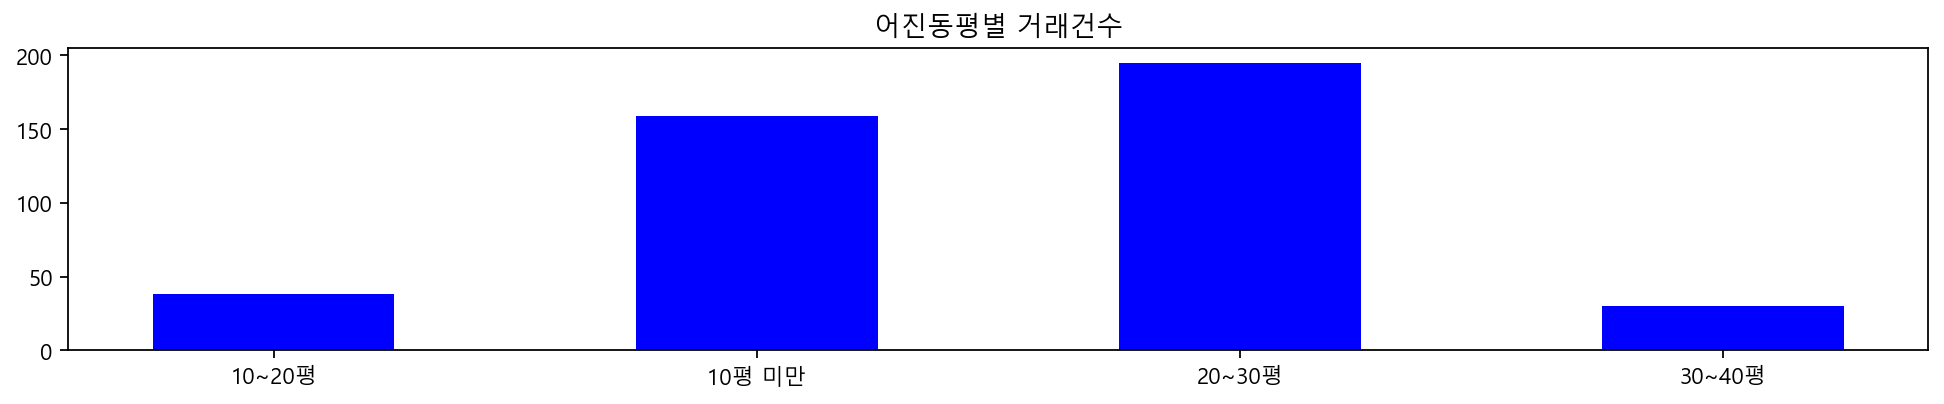

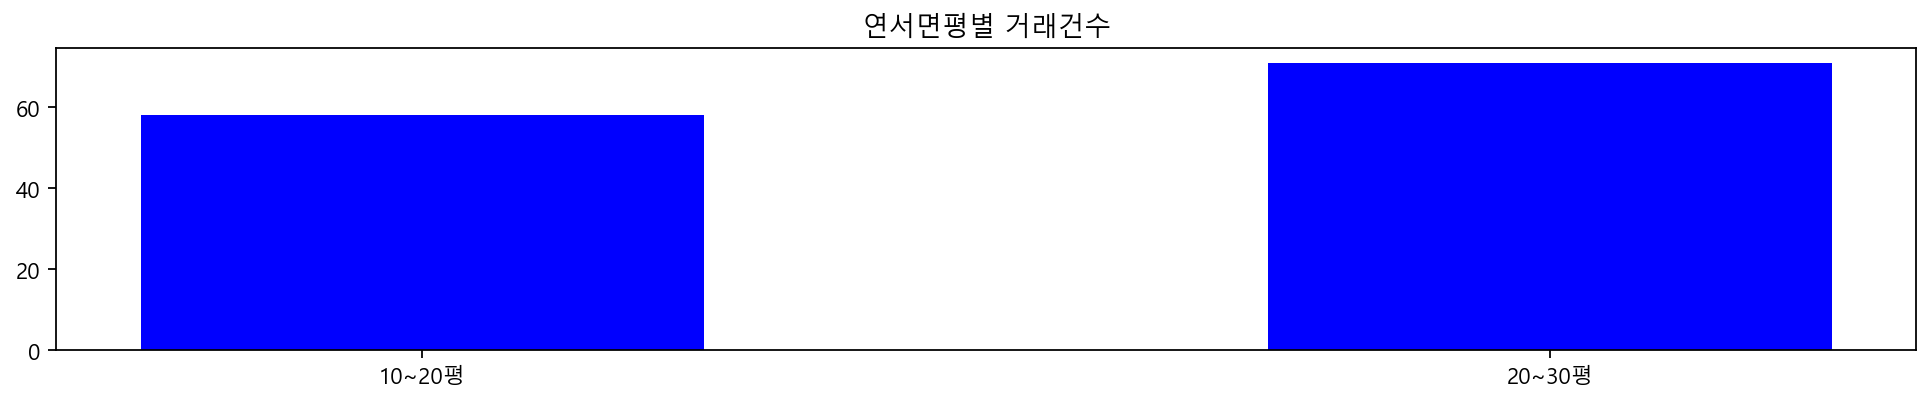

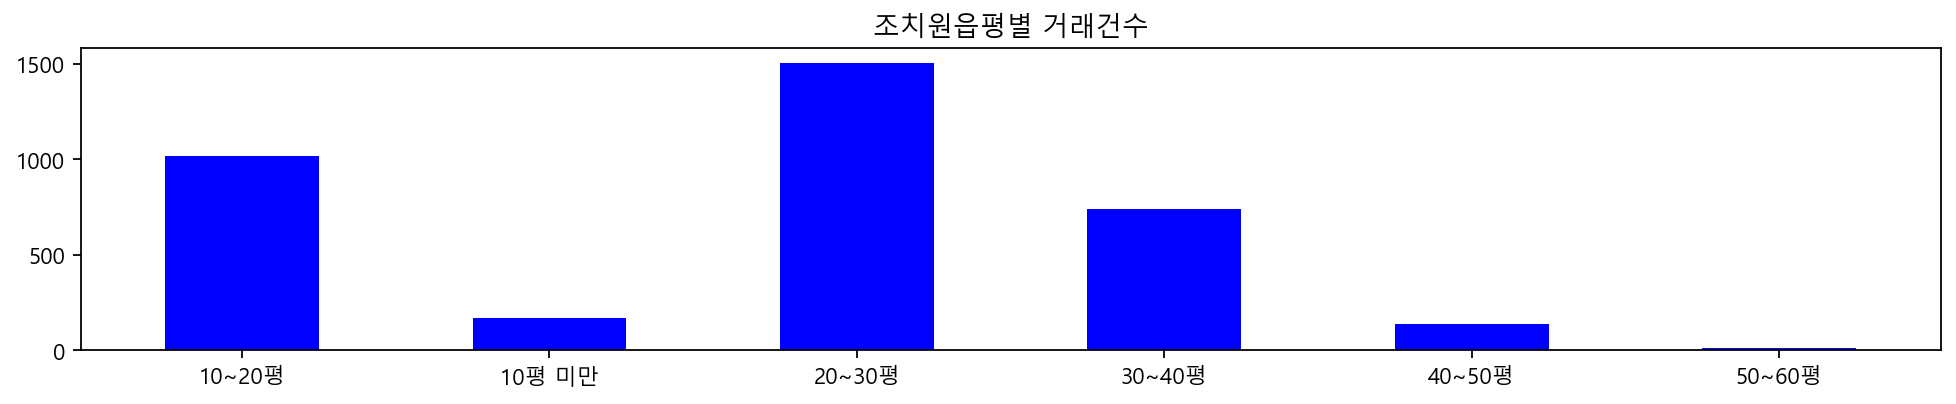

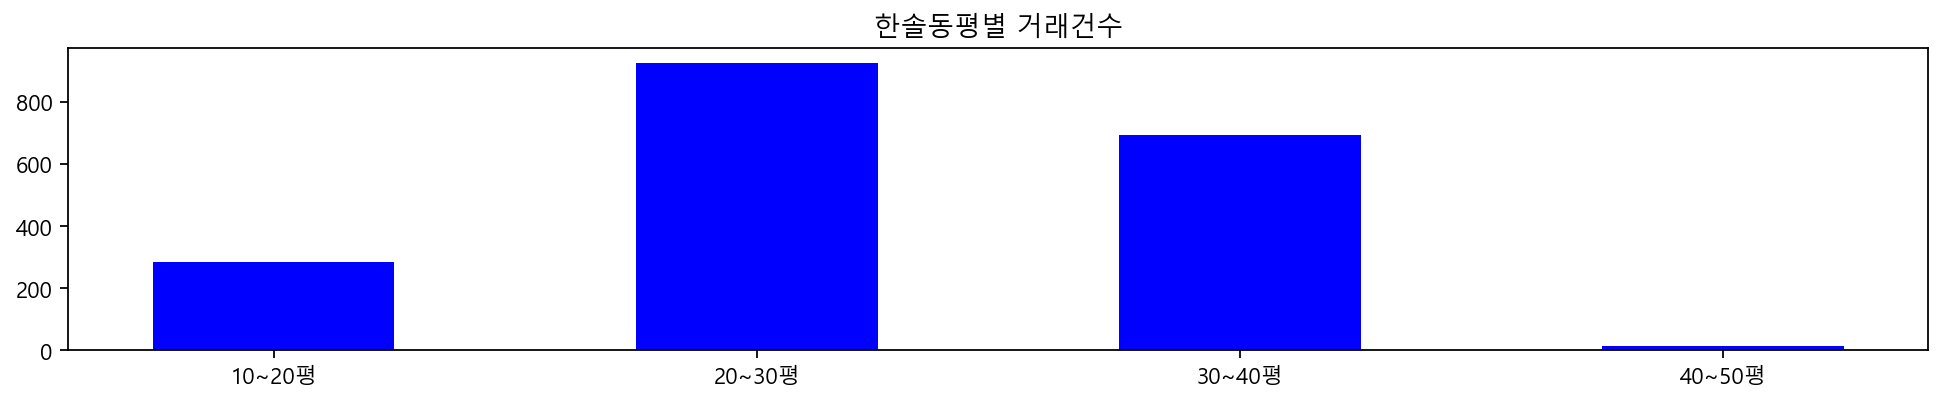

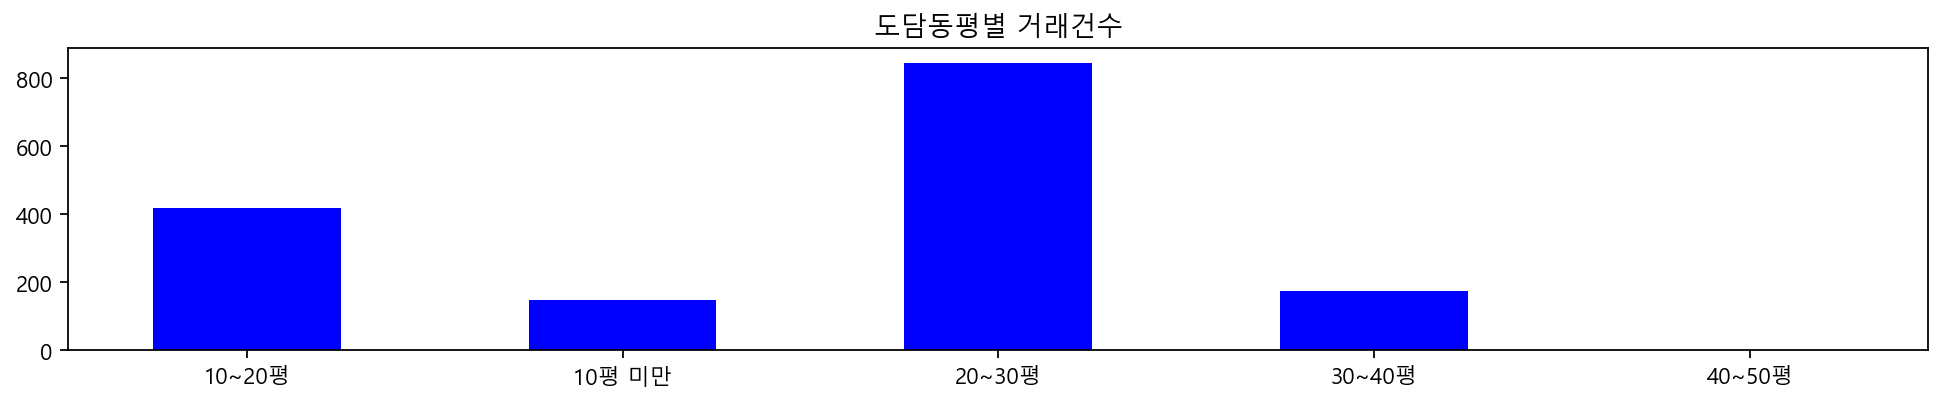

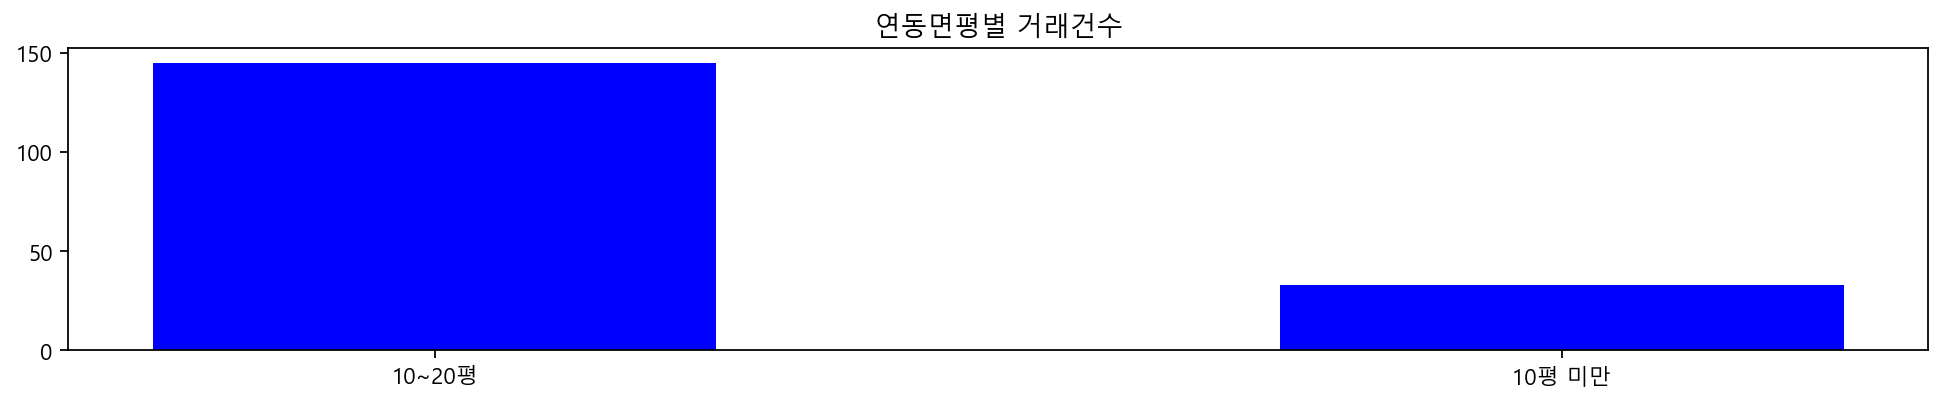

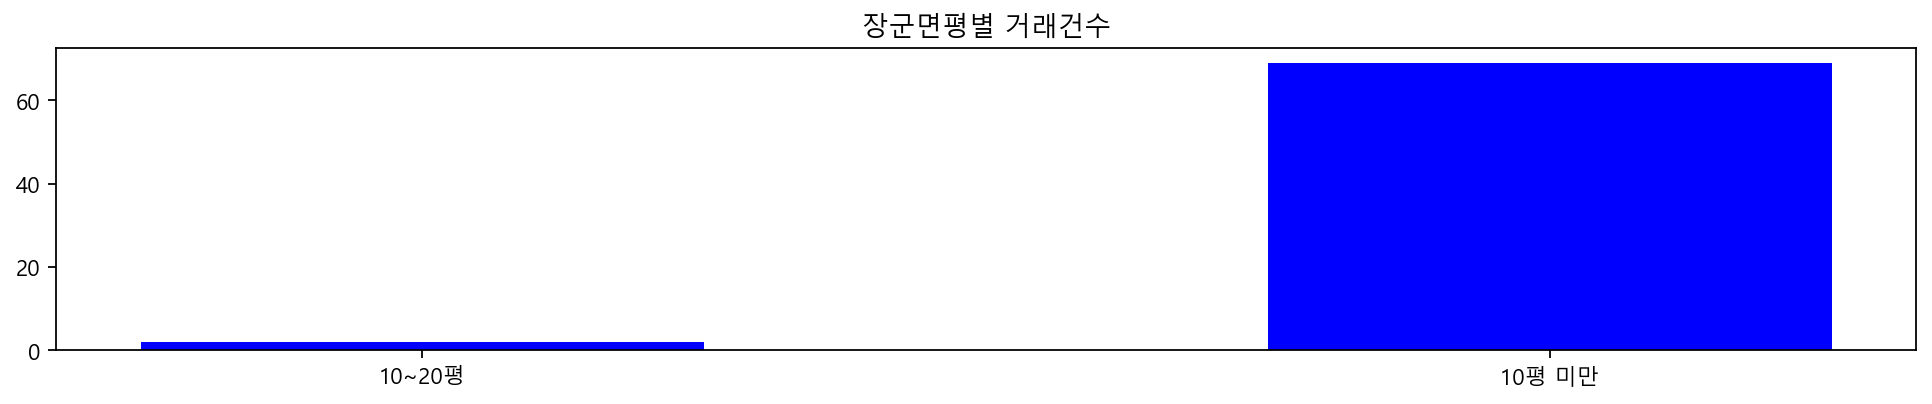

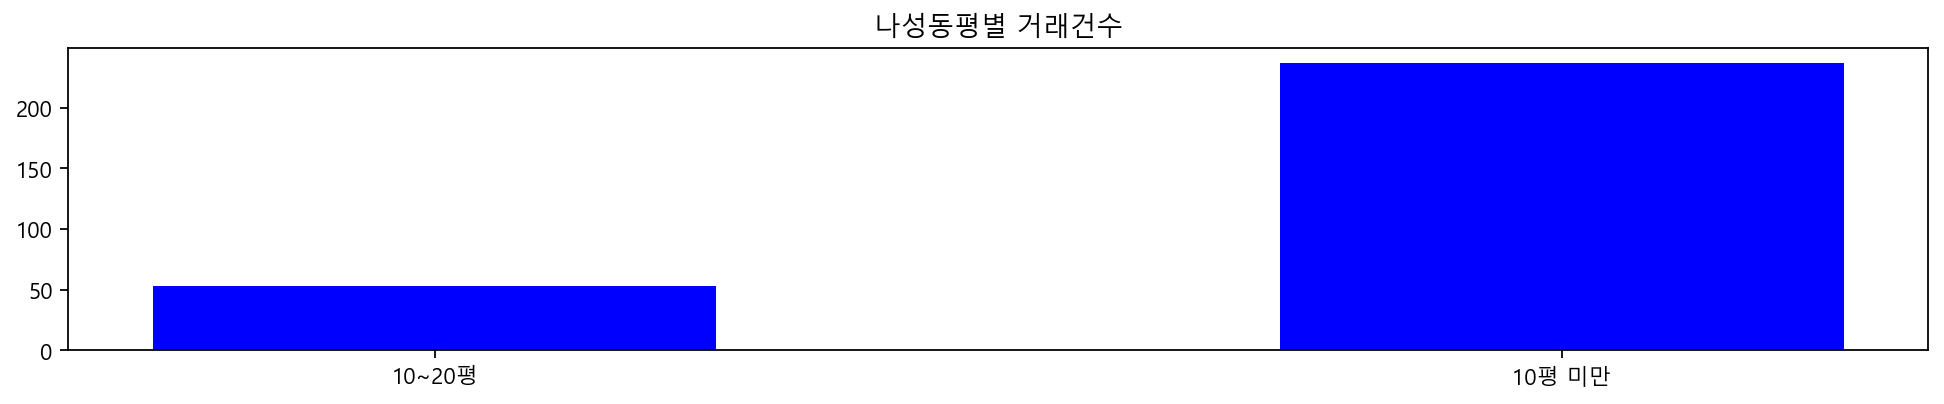

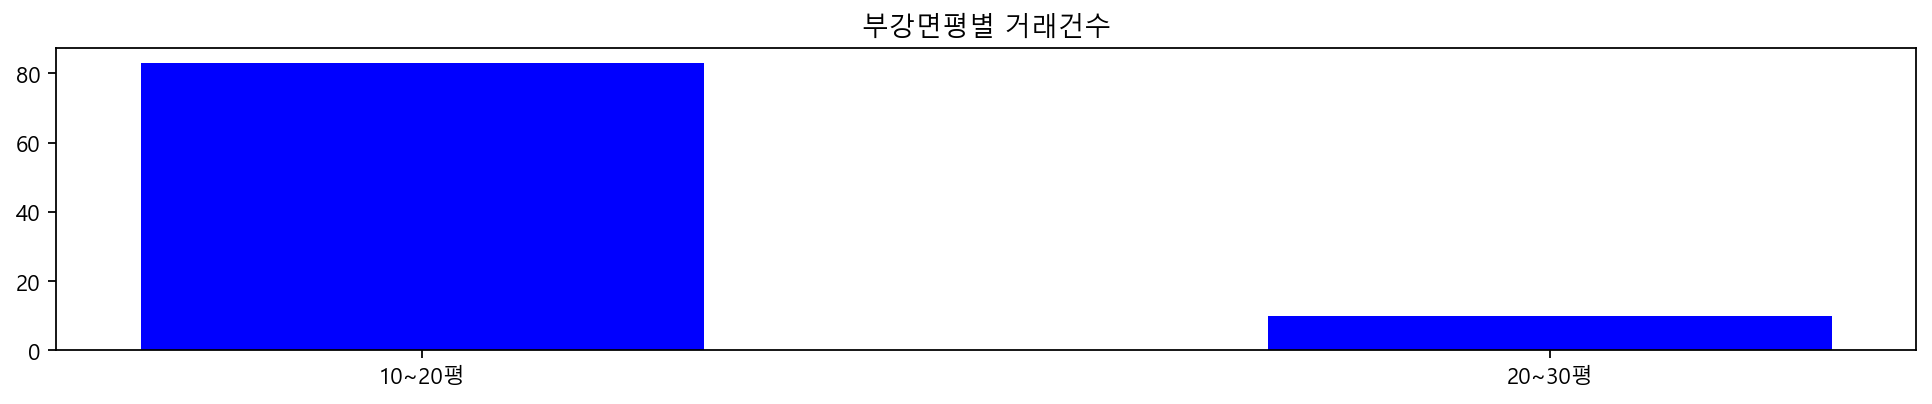

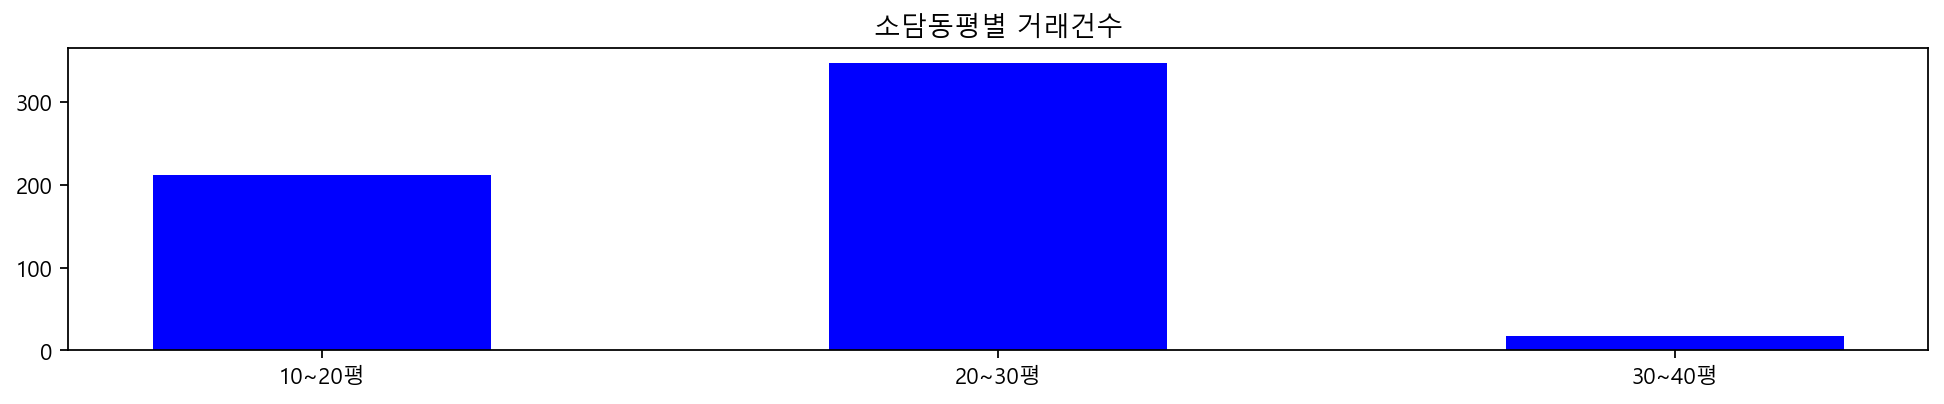

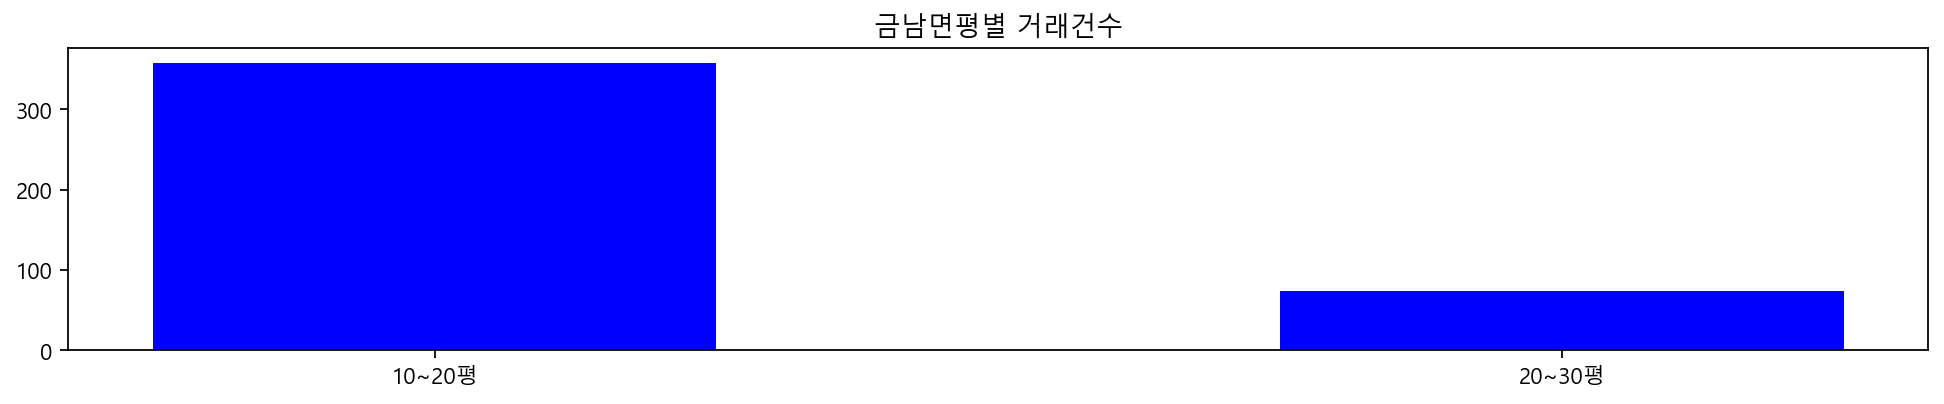

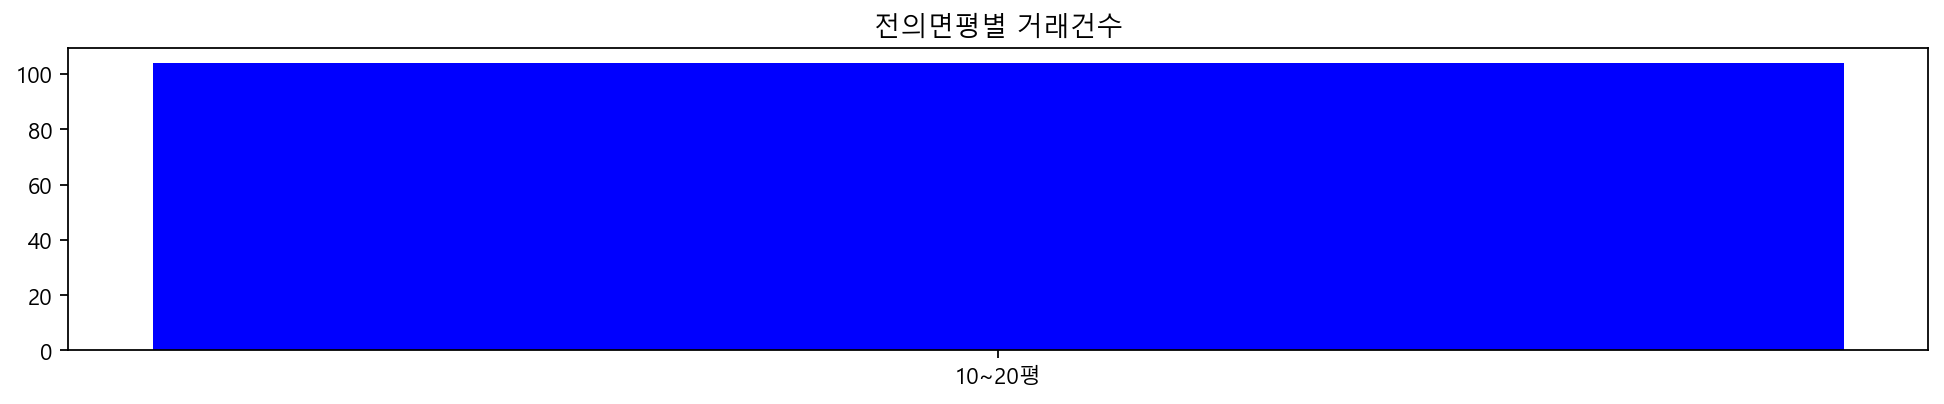

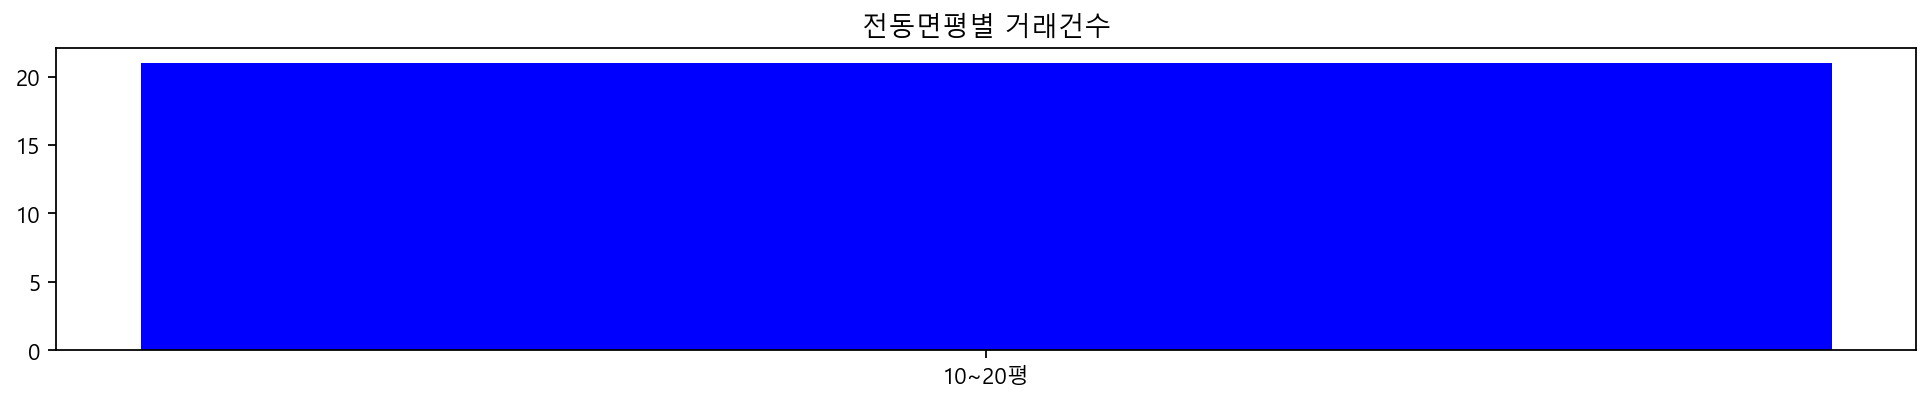

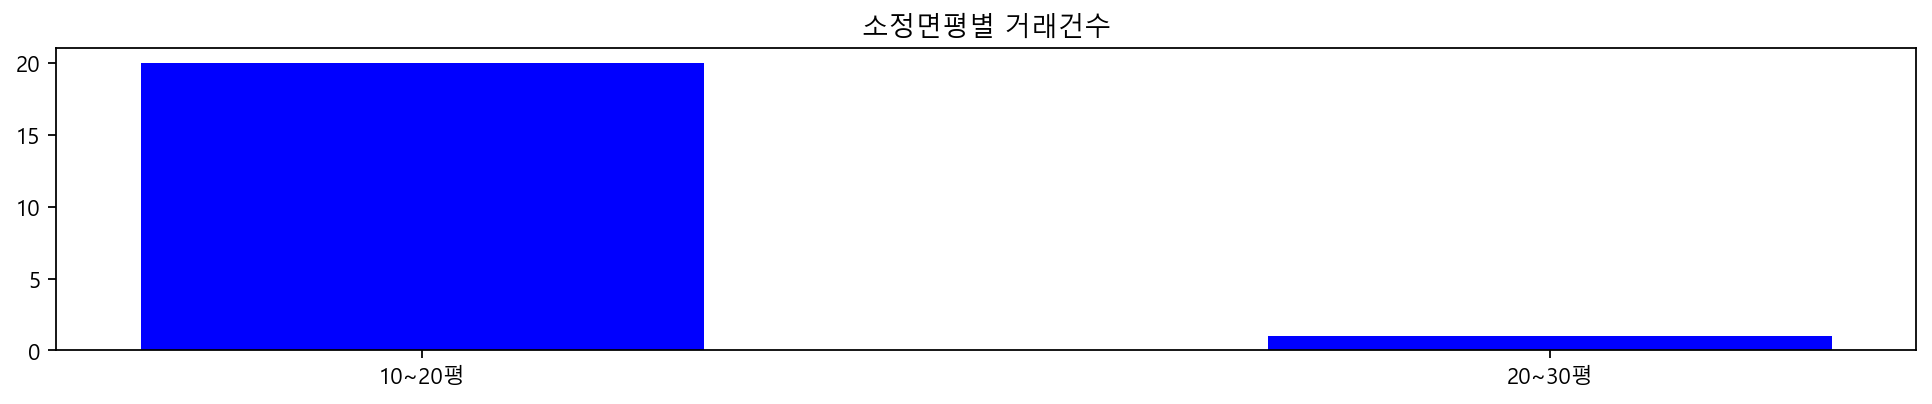

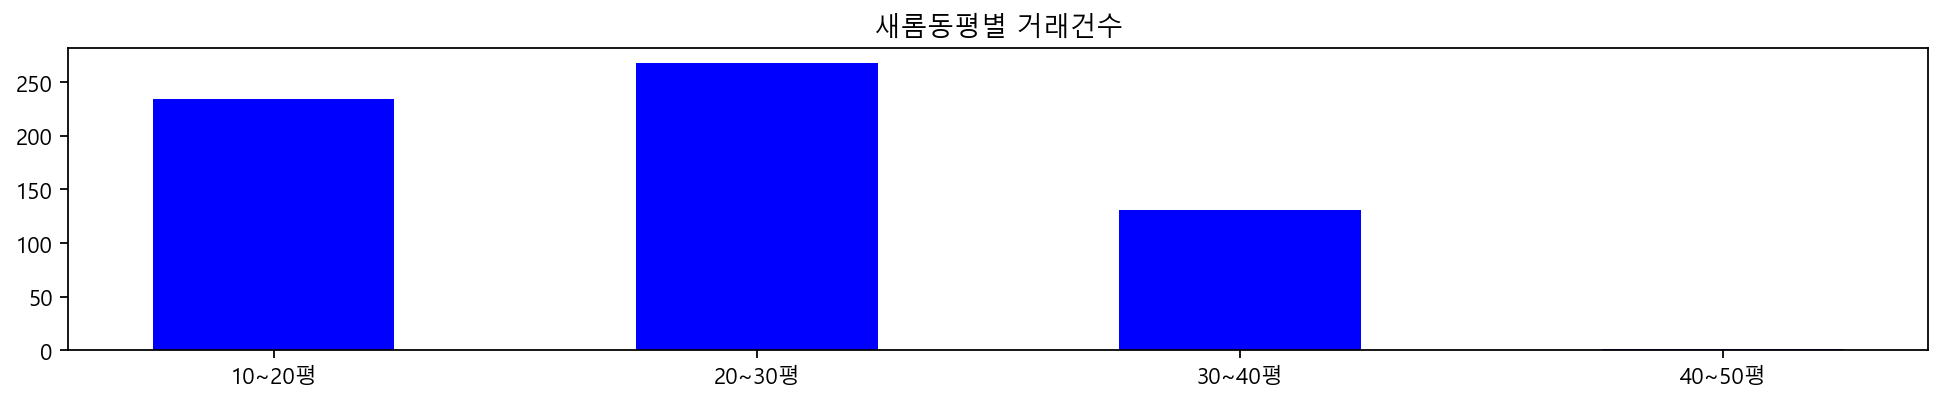

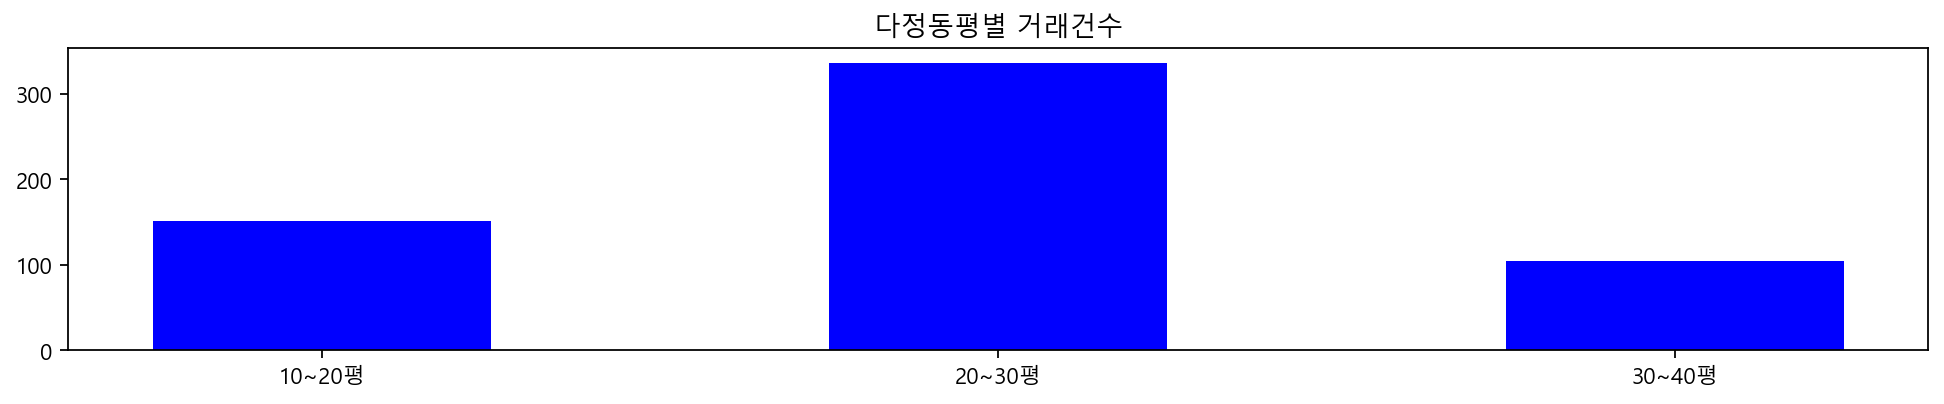

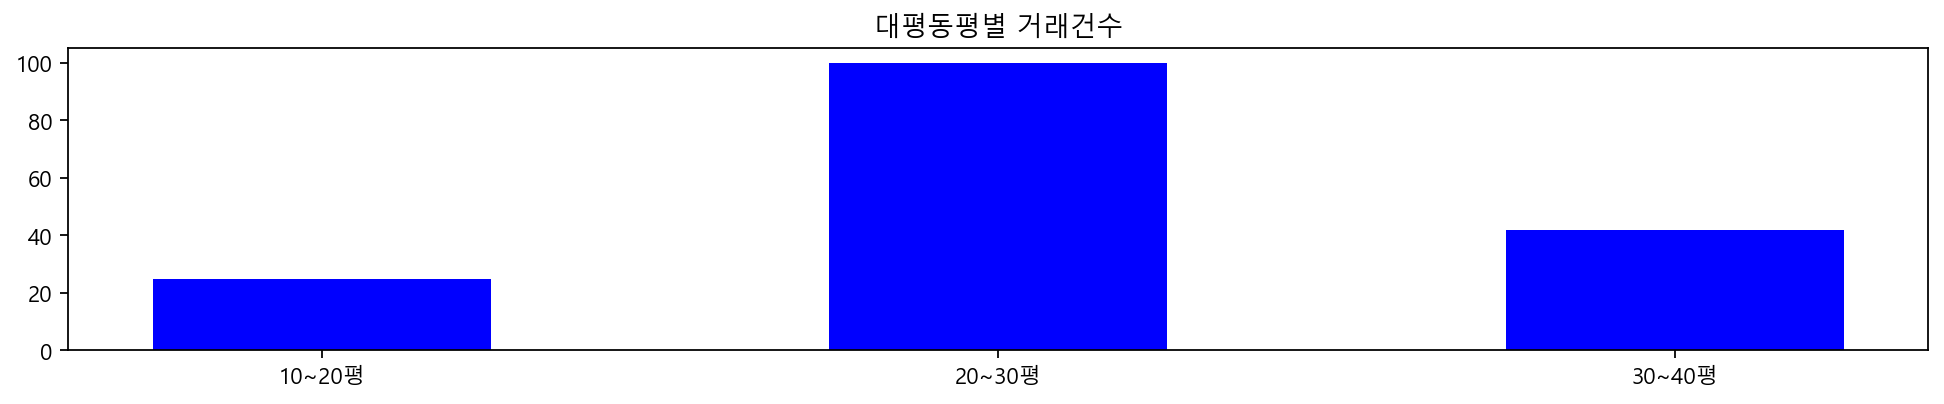

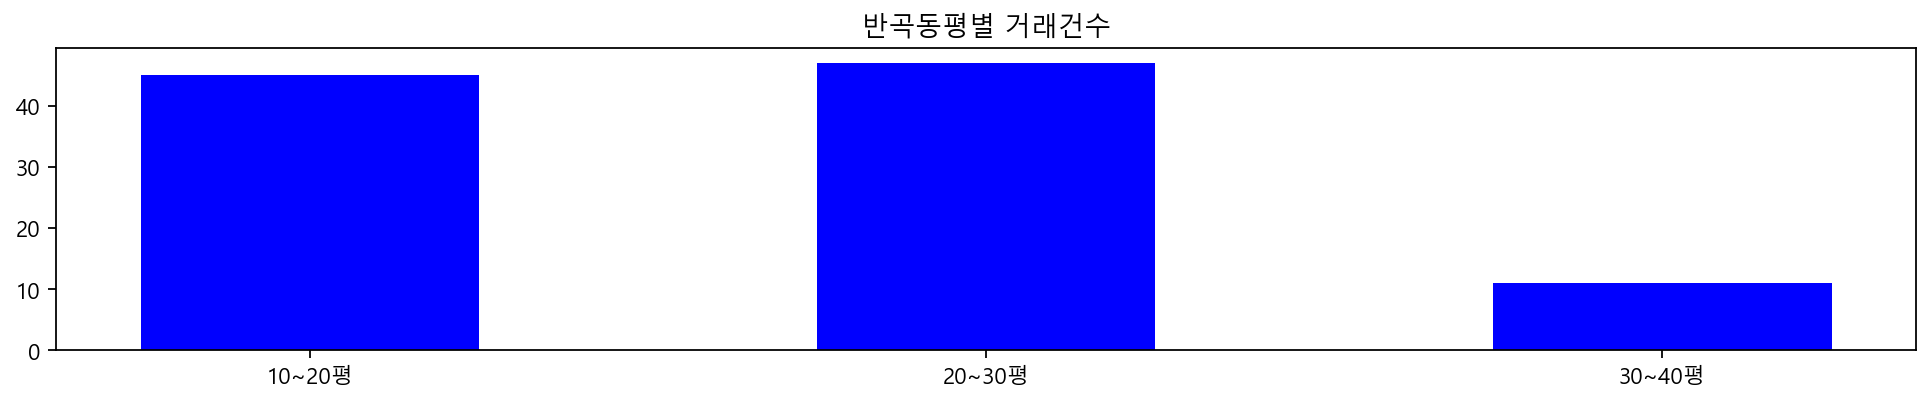

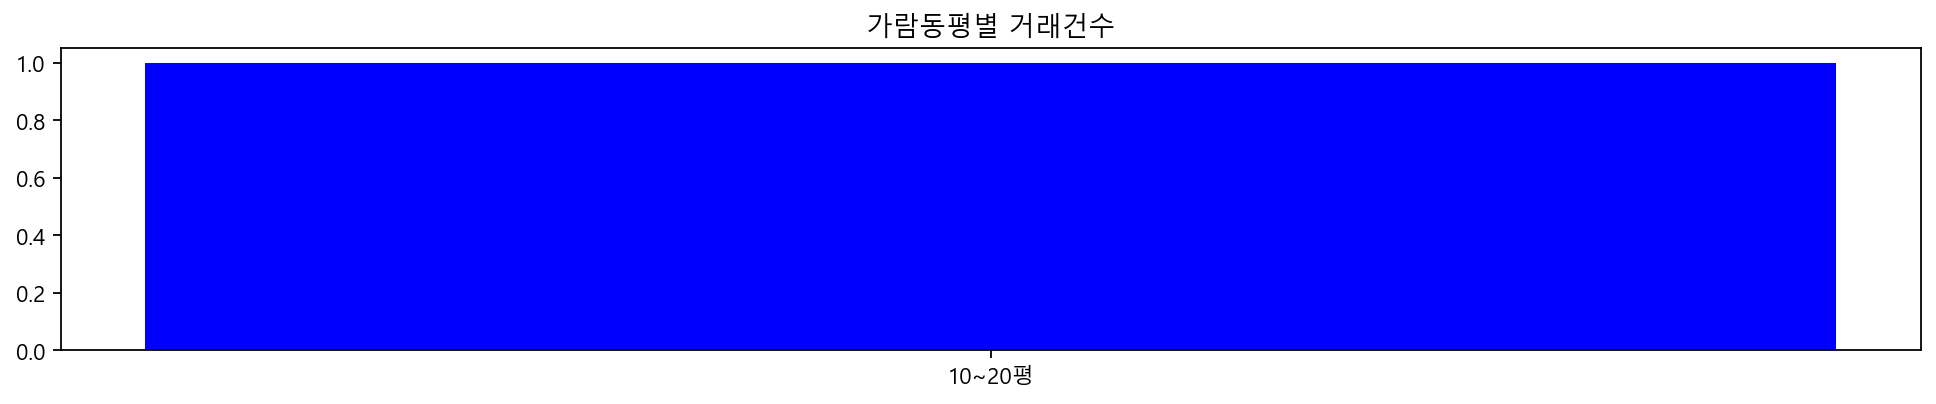

In [149]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['평']).count()
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+'평별 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

In [150]:
def year(df):
    return df[:-2]
data['계약년월']=data['계약년월'].astype(str)
data['계약년']=data['계약년월'].apply(year)

<ipython-input-151-ff348b9f4665>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,2.5),dpi=160)


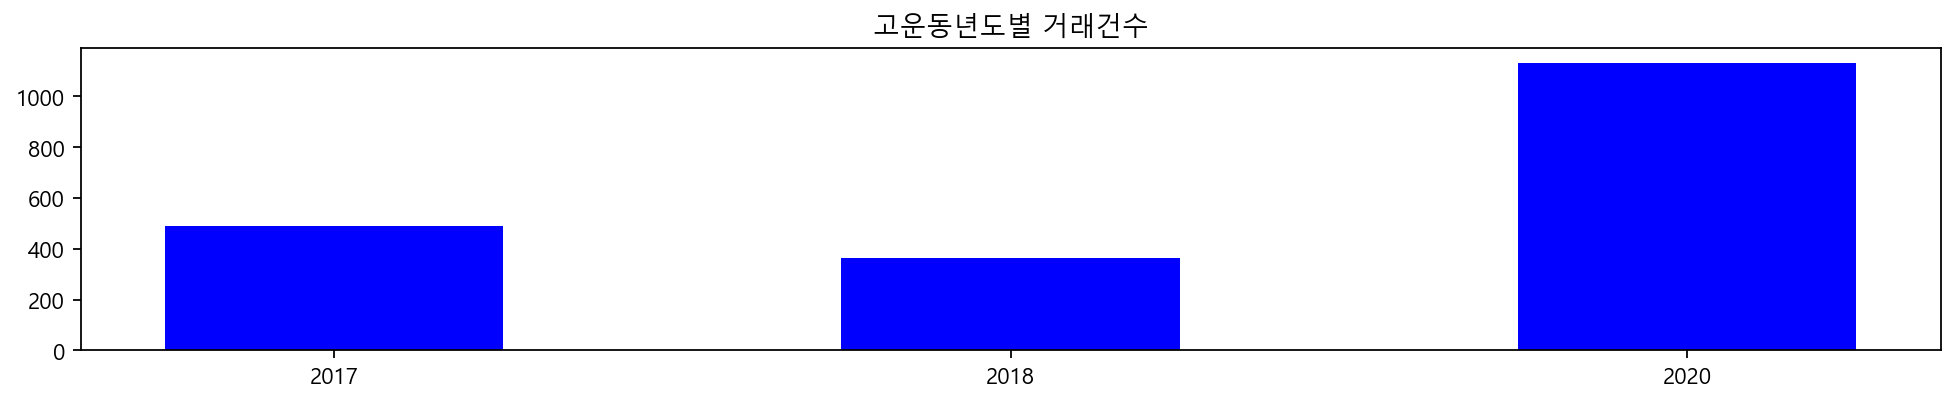

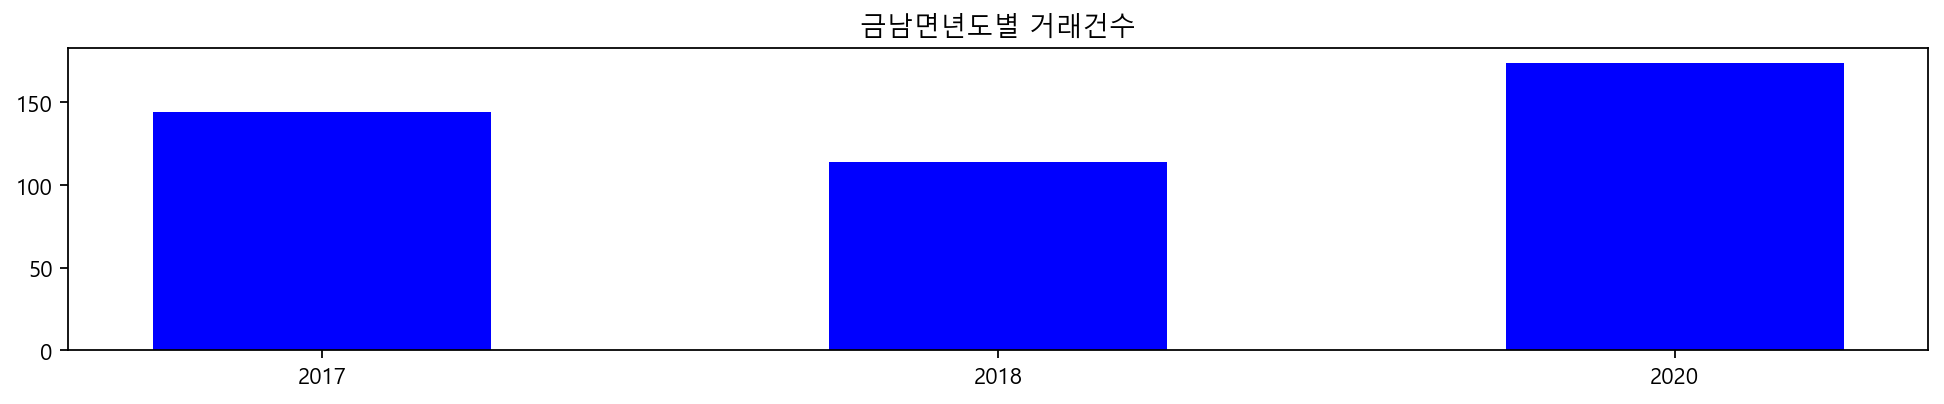

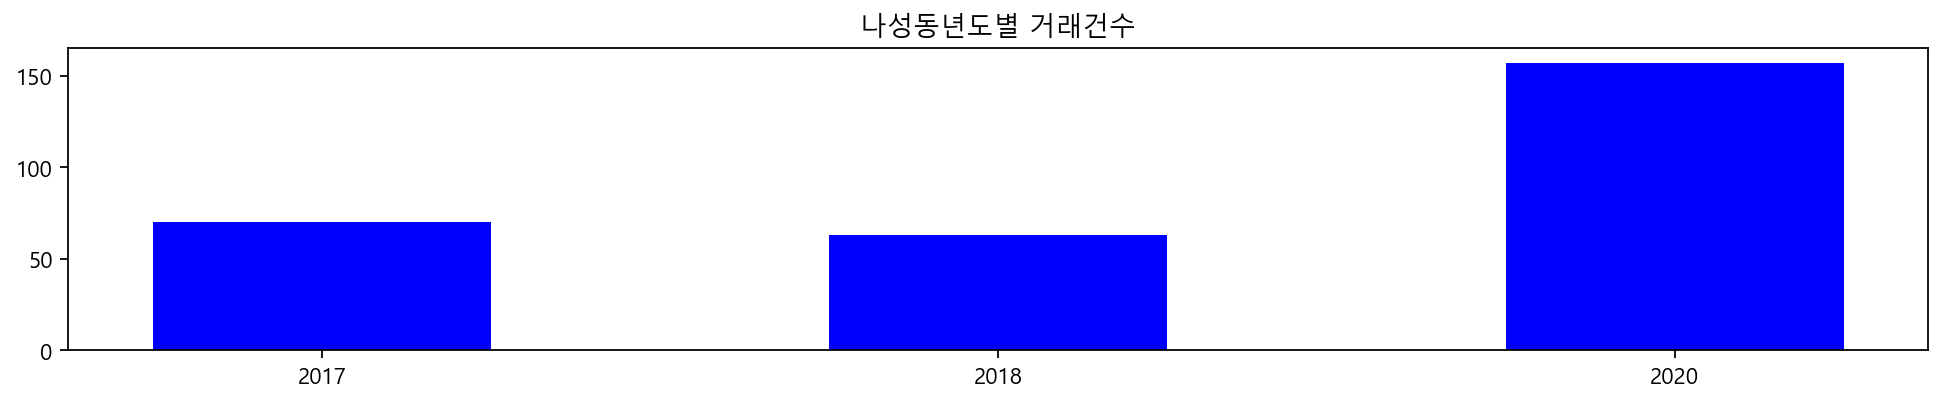

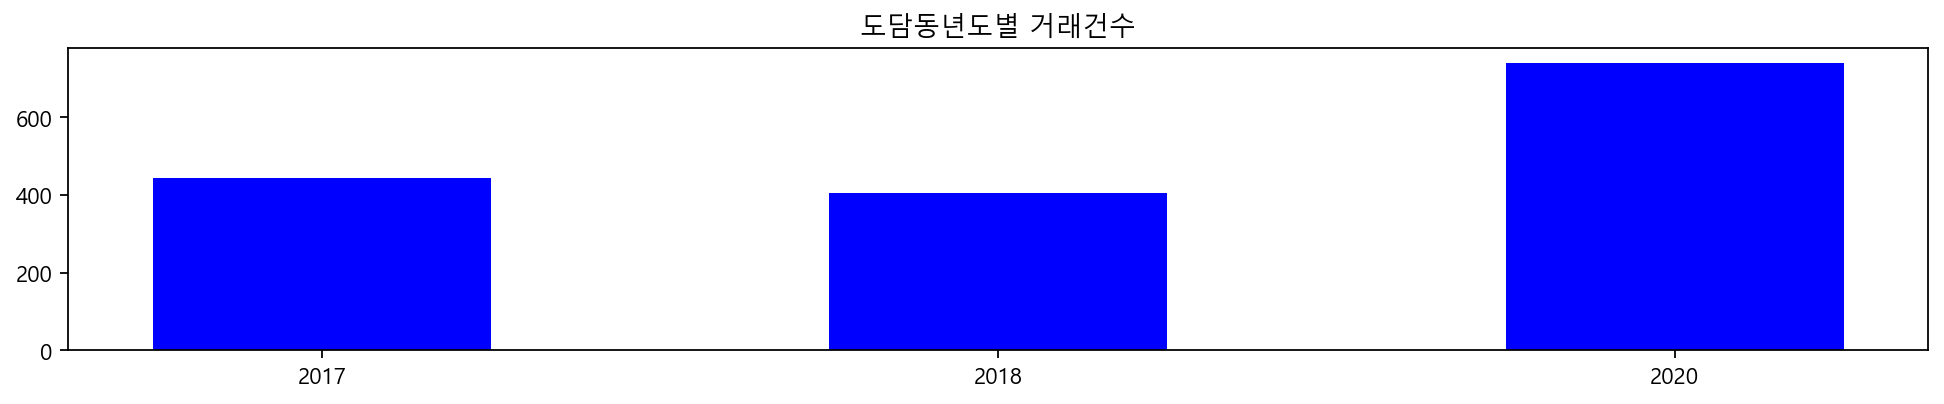

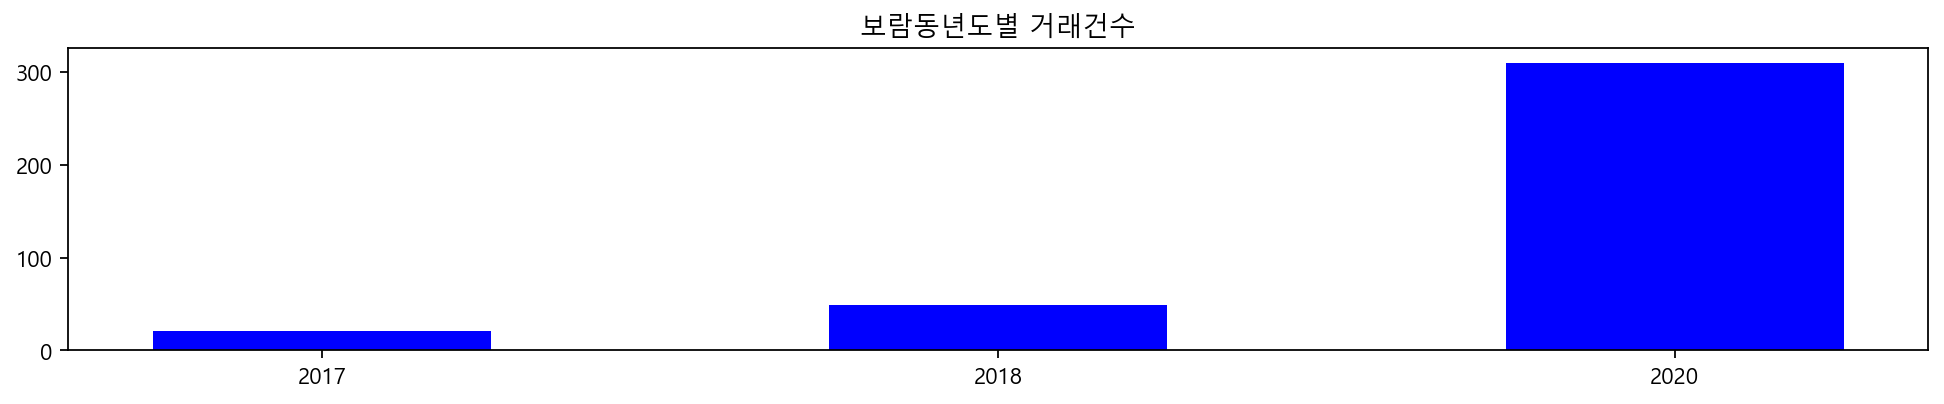

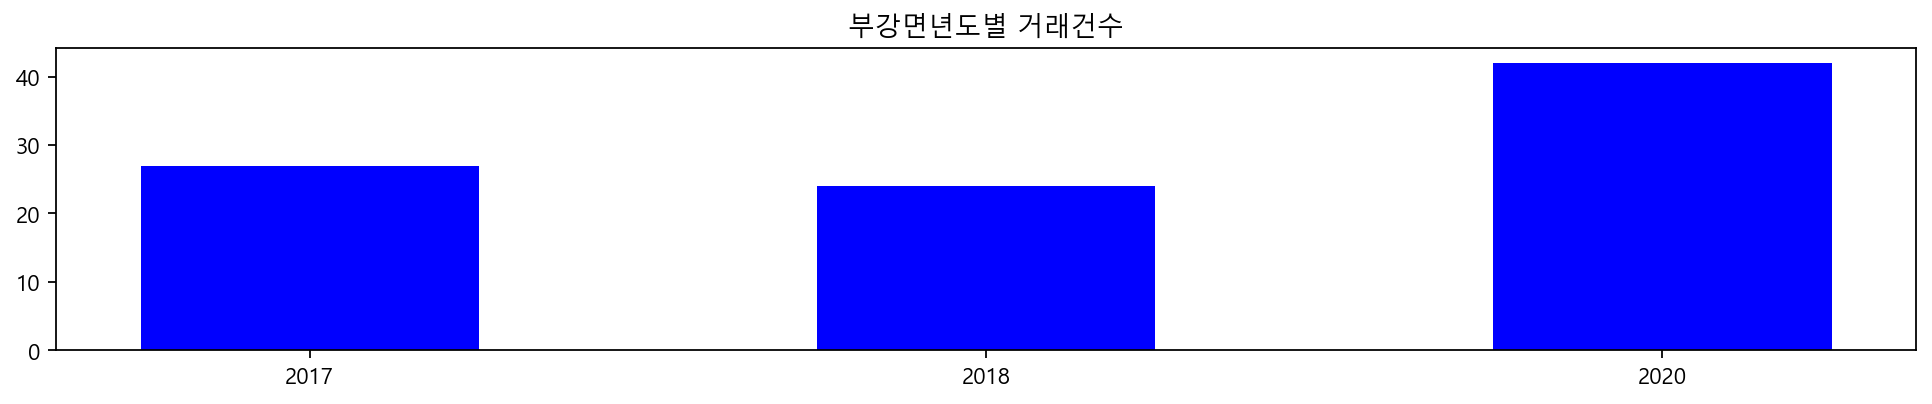

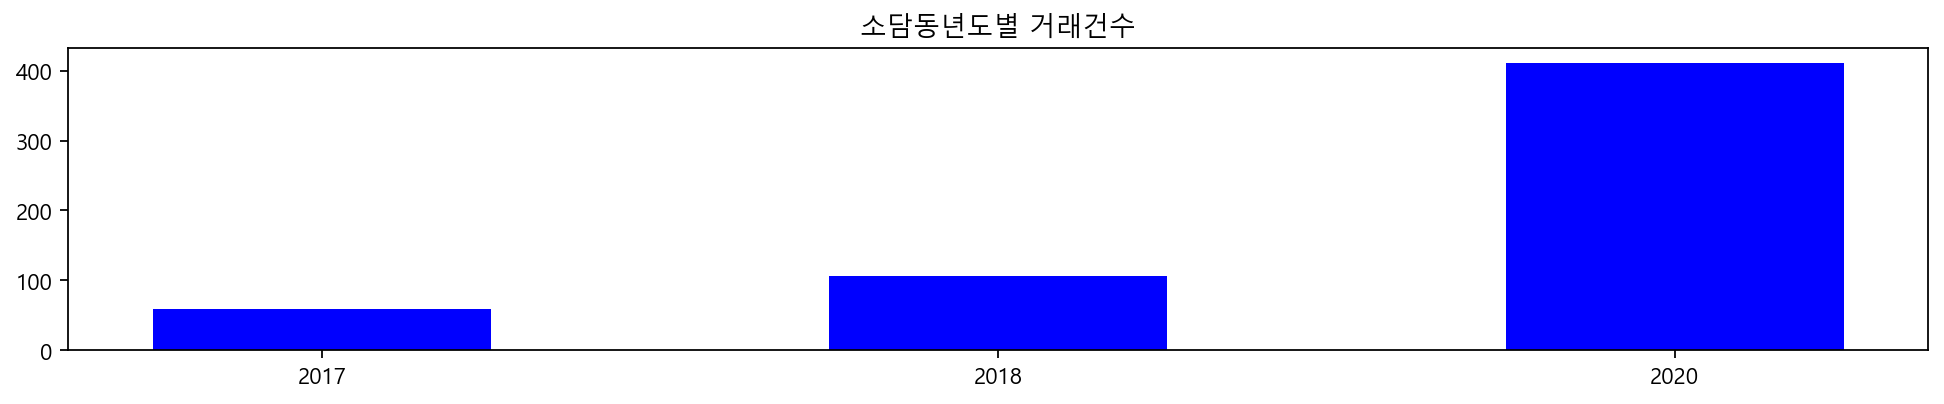

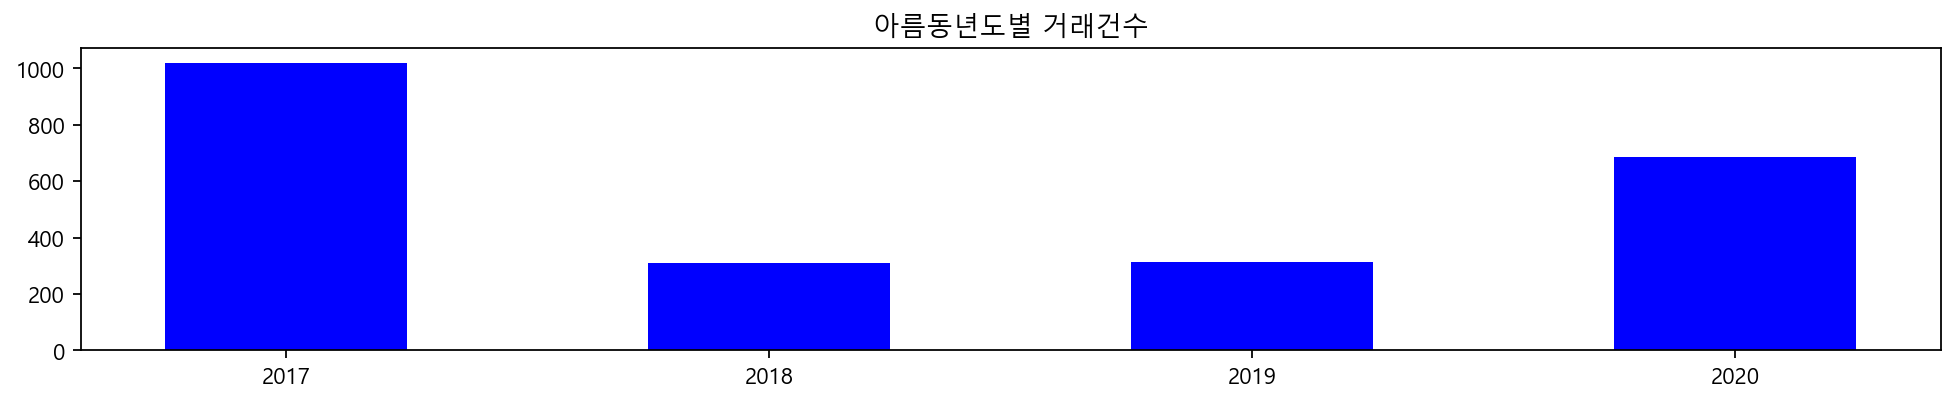

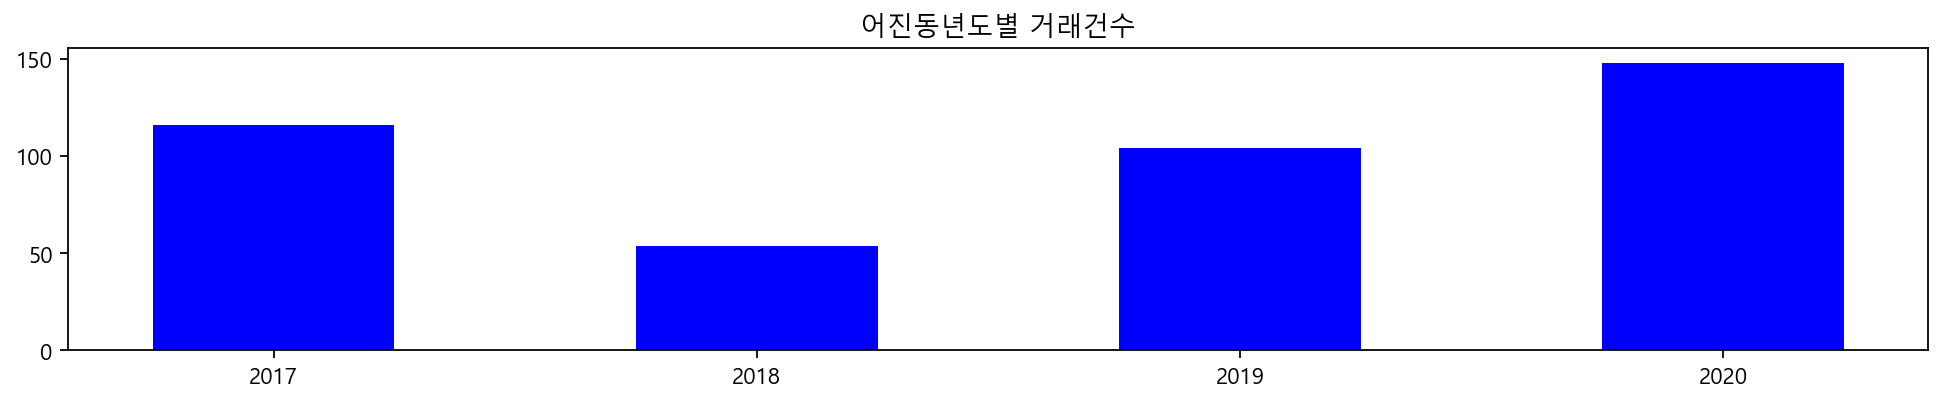

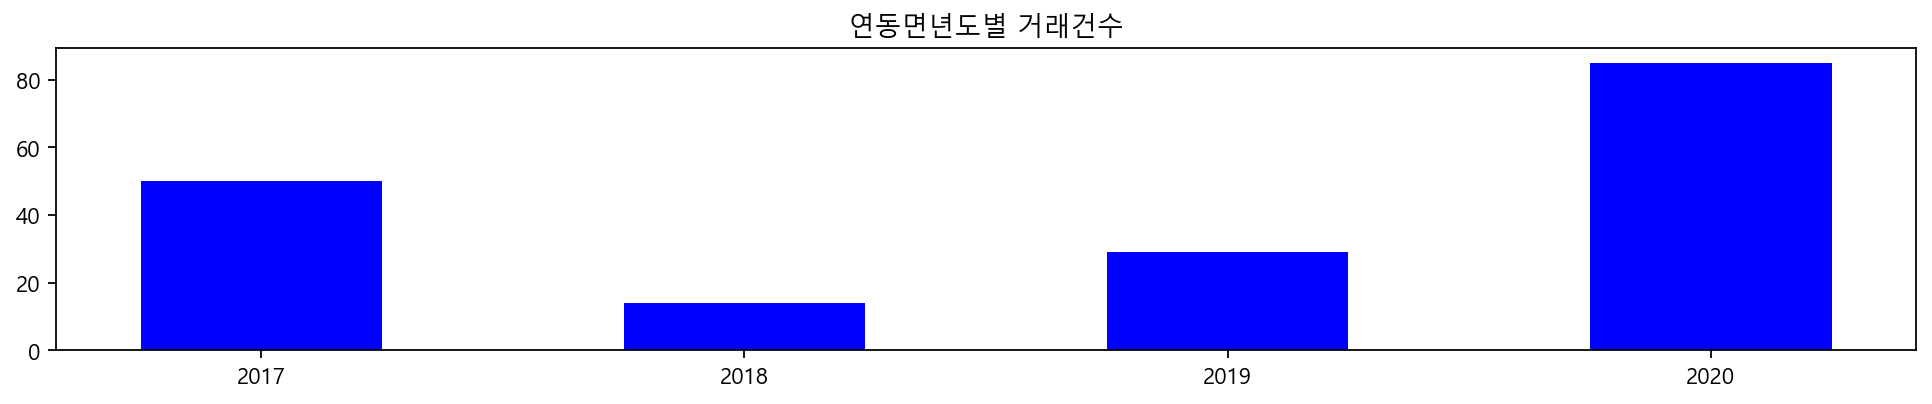

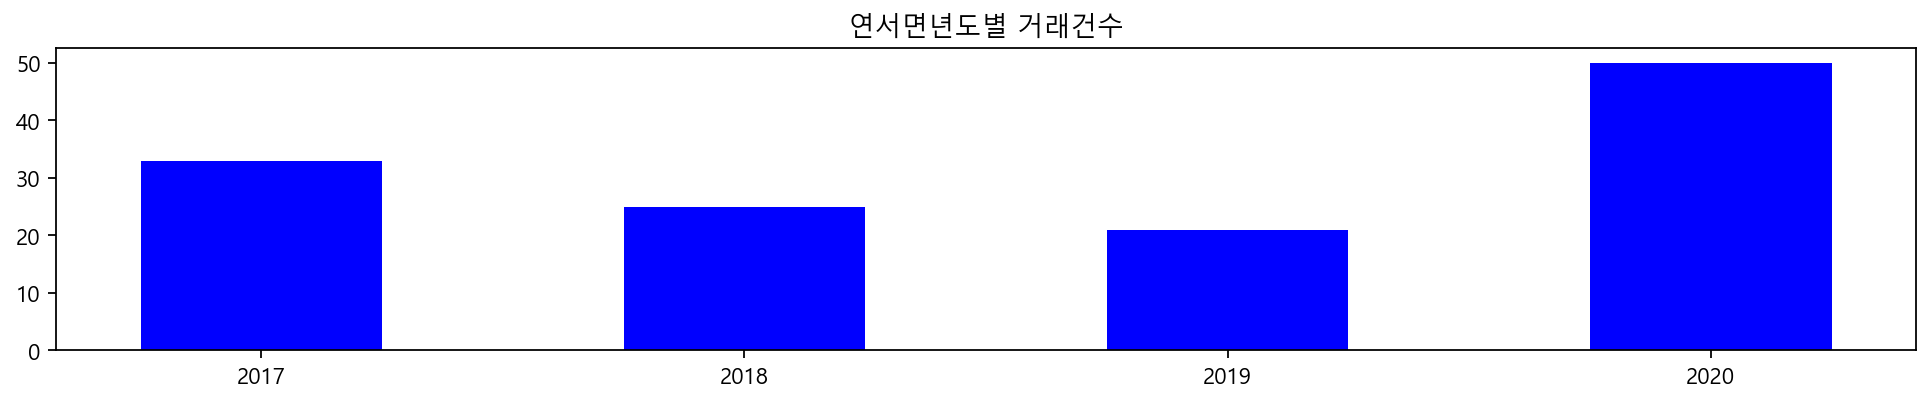

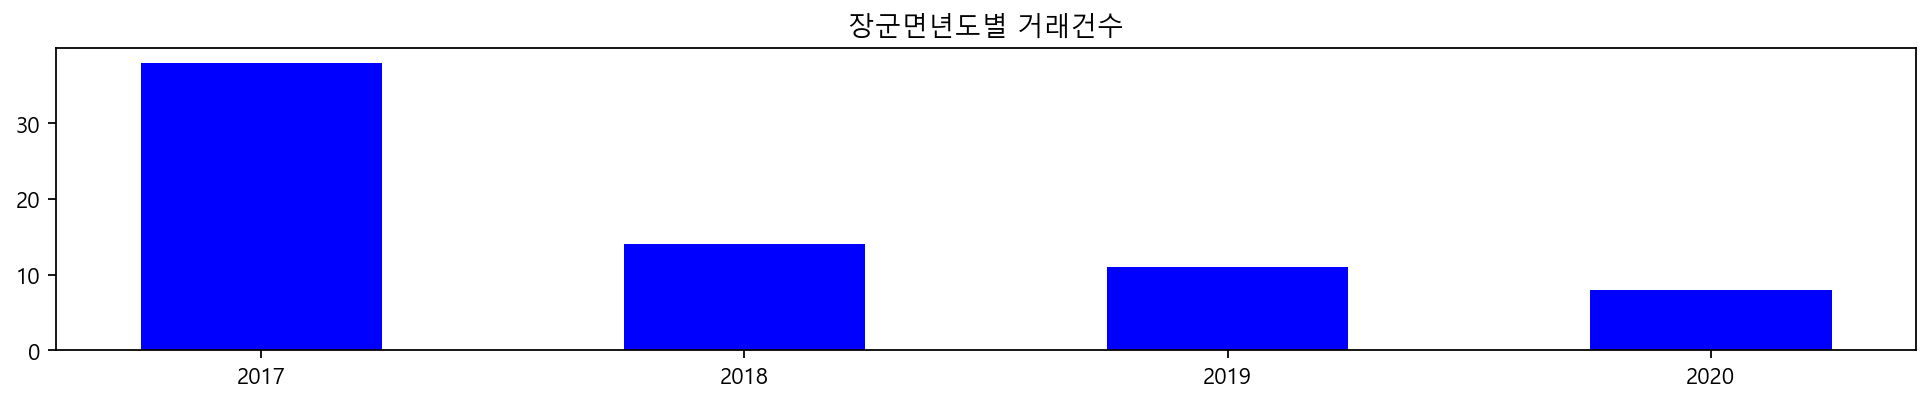

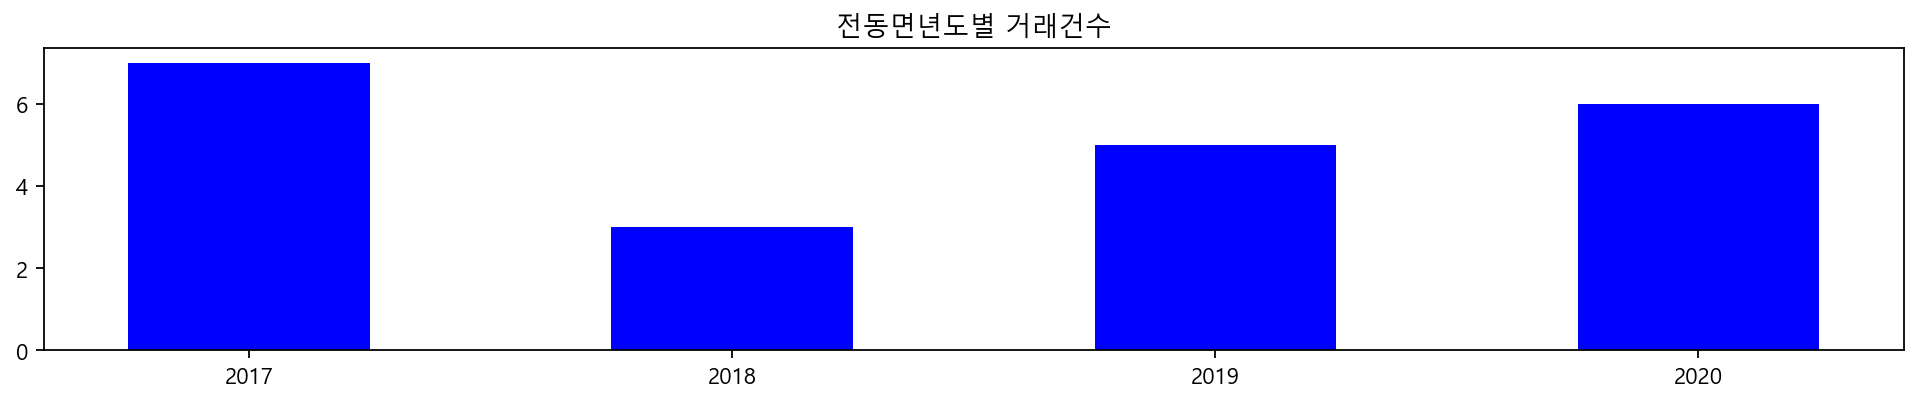

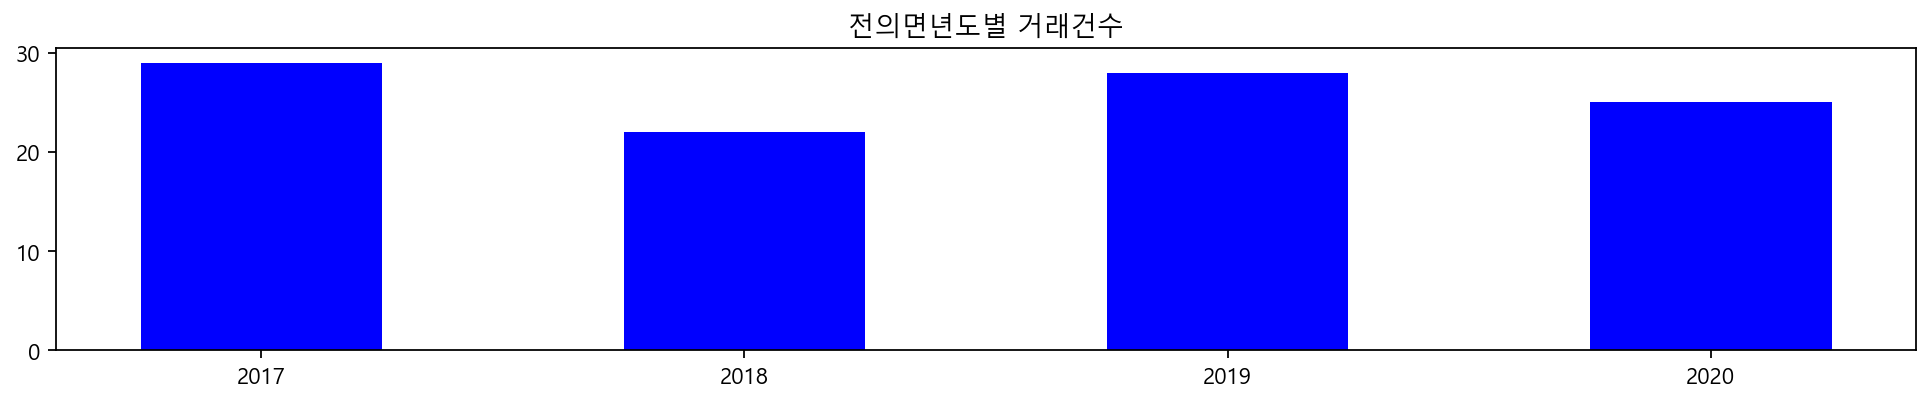

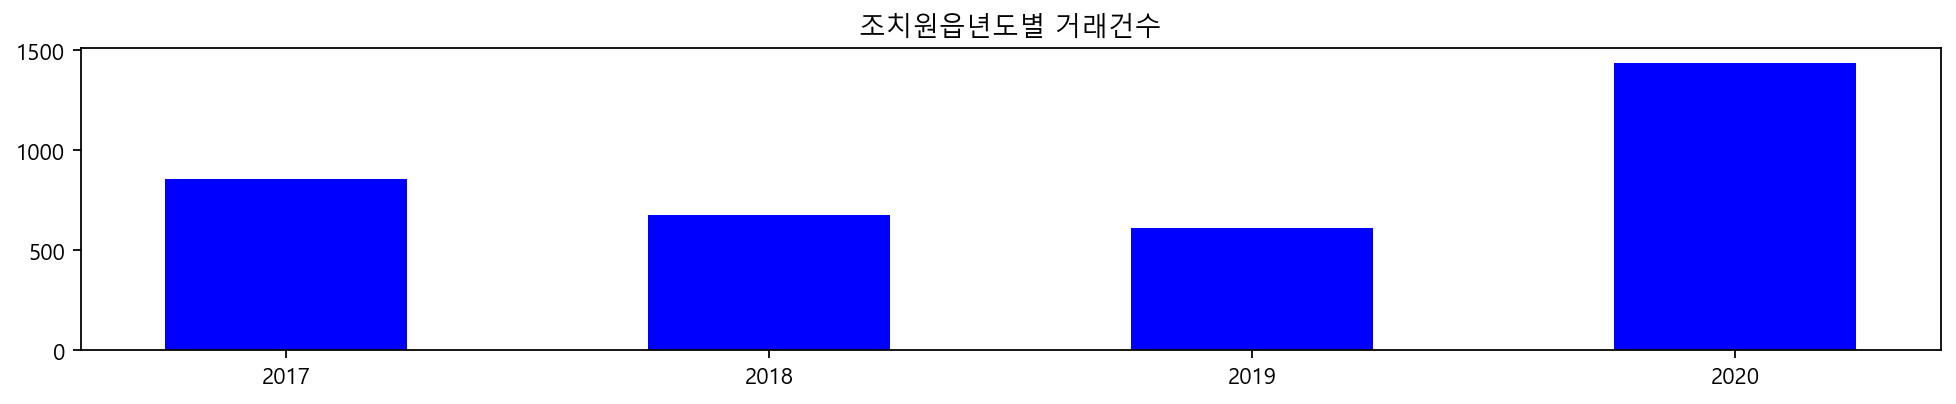

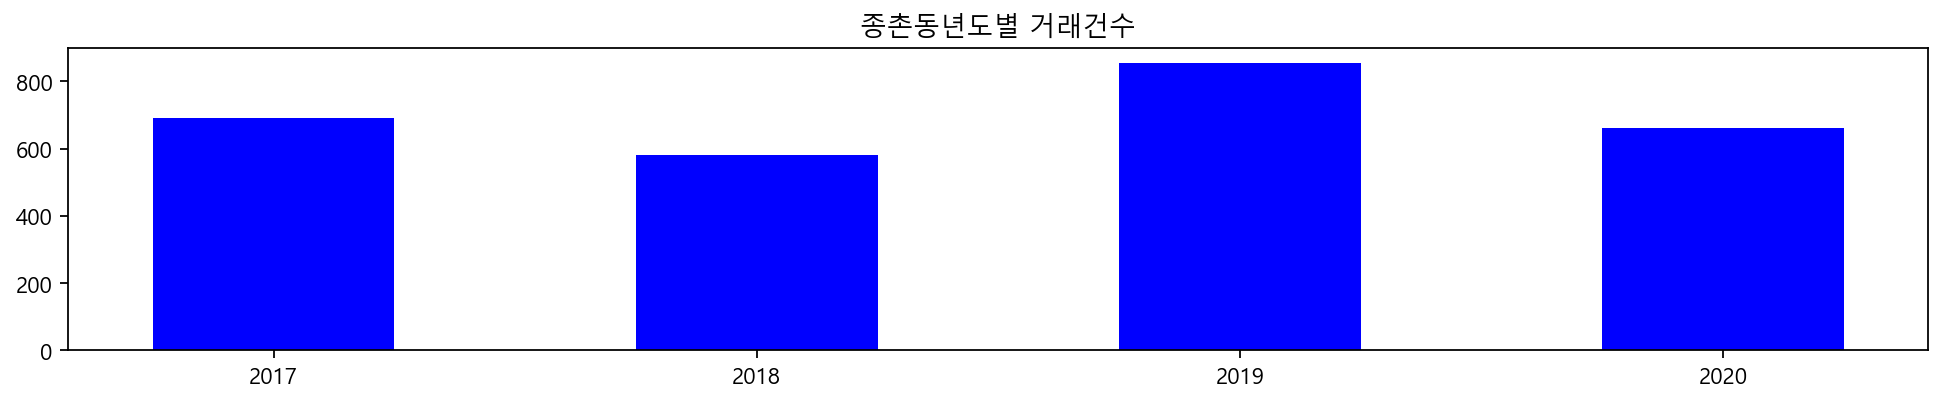

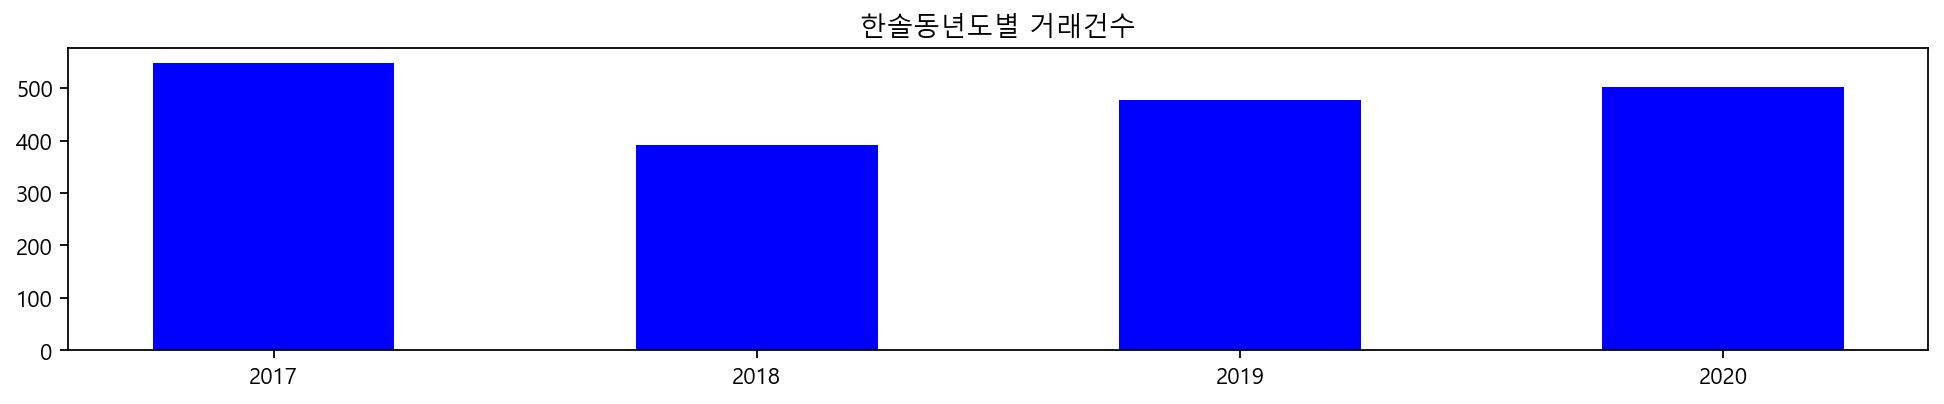

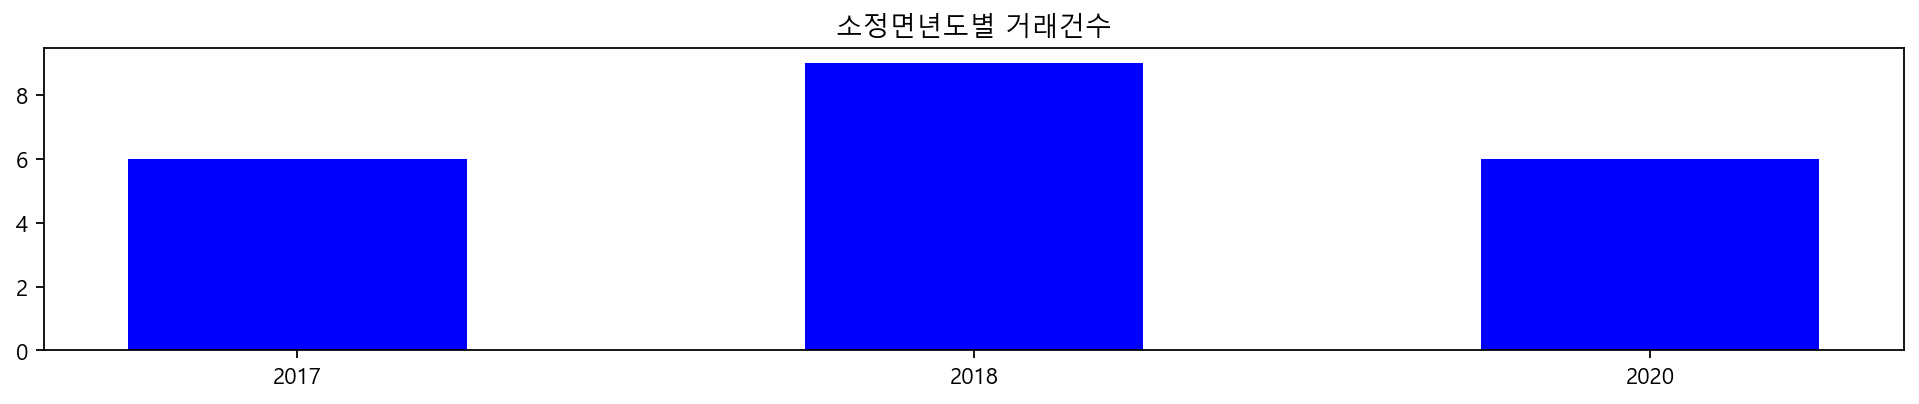

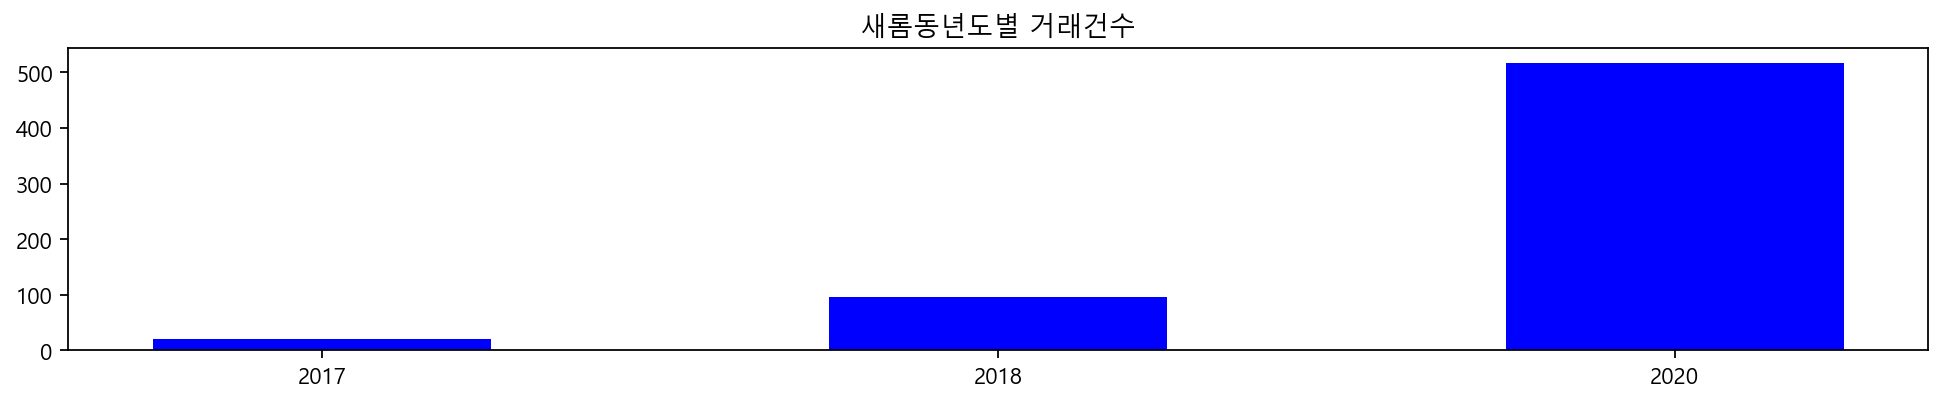

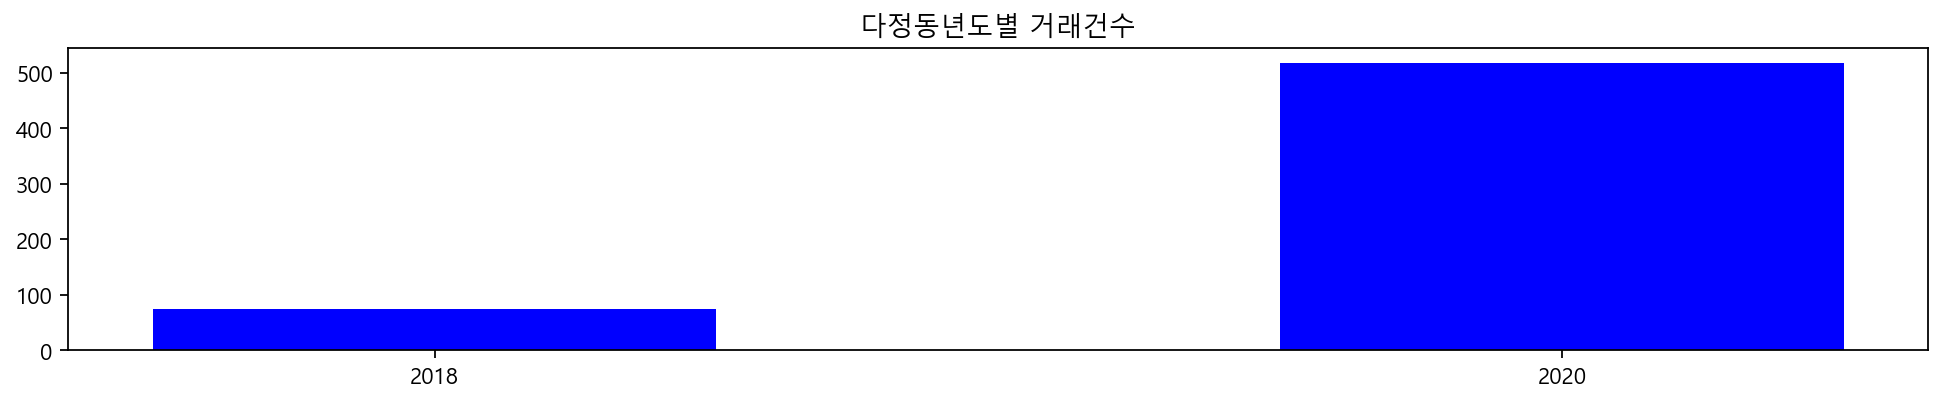

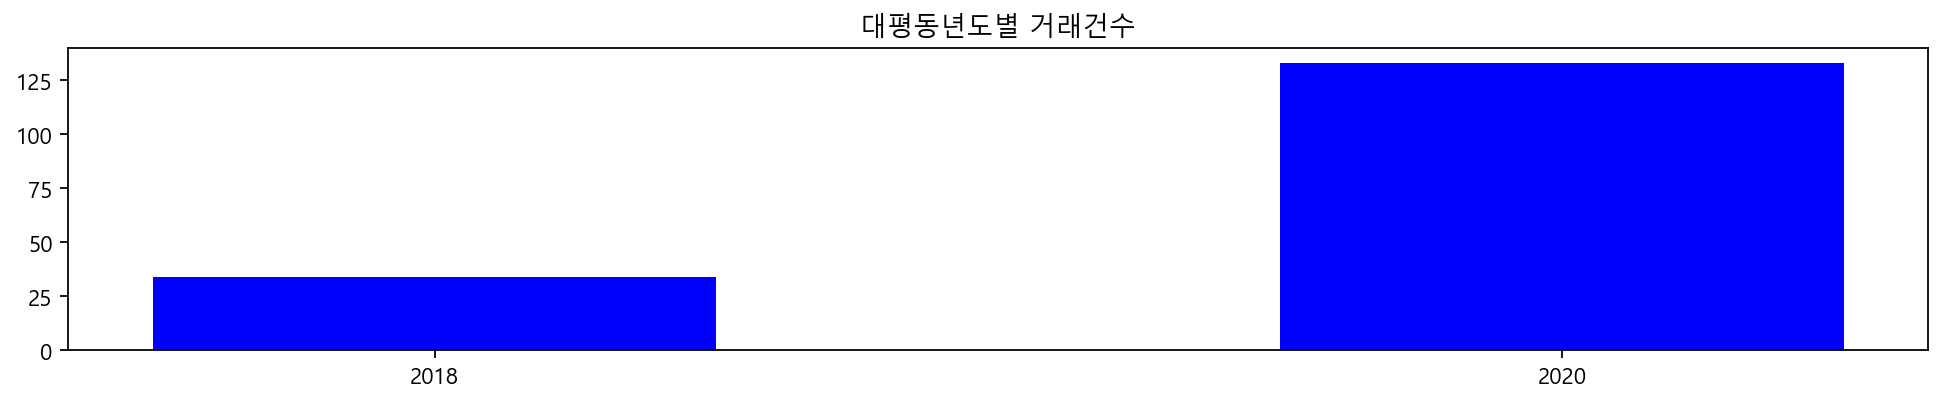

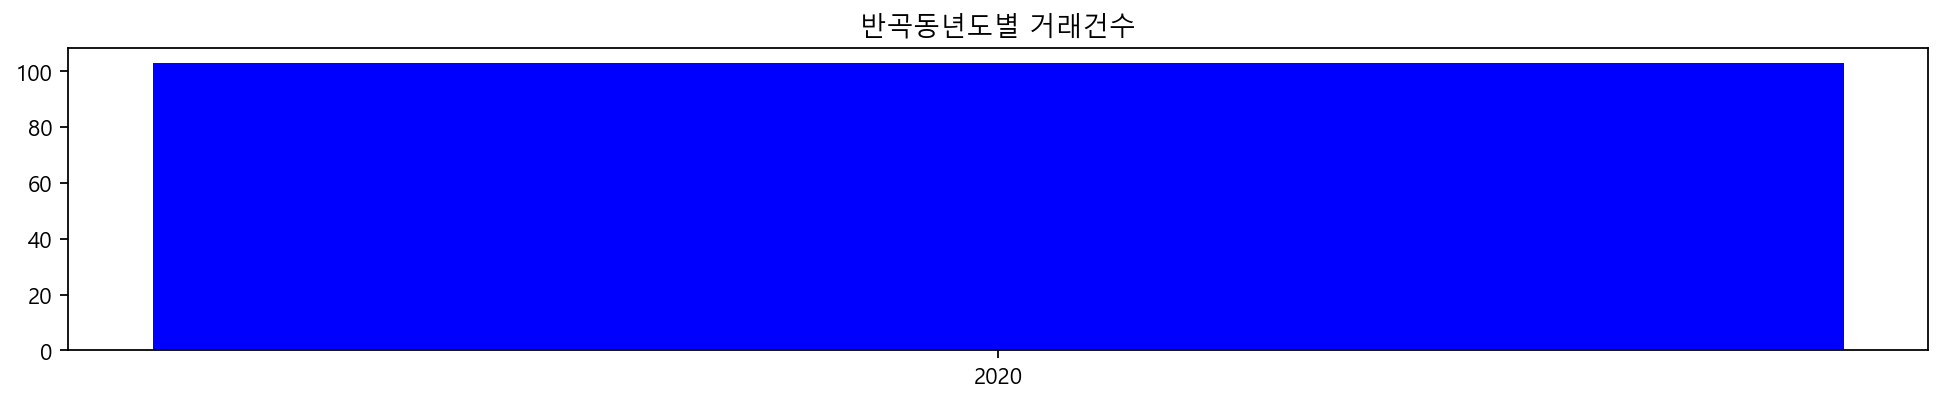

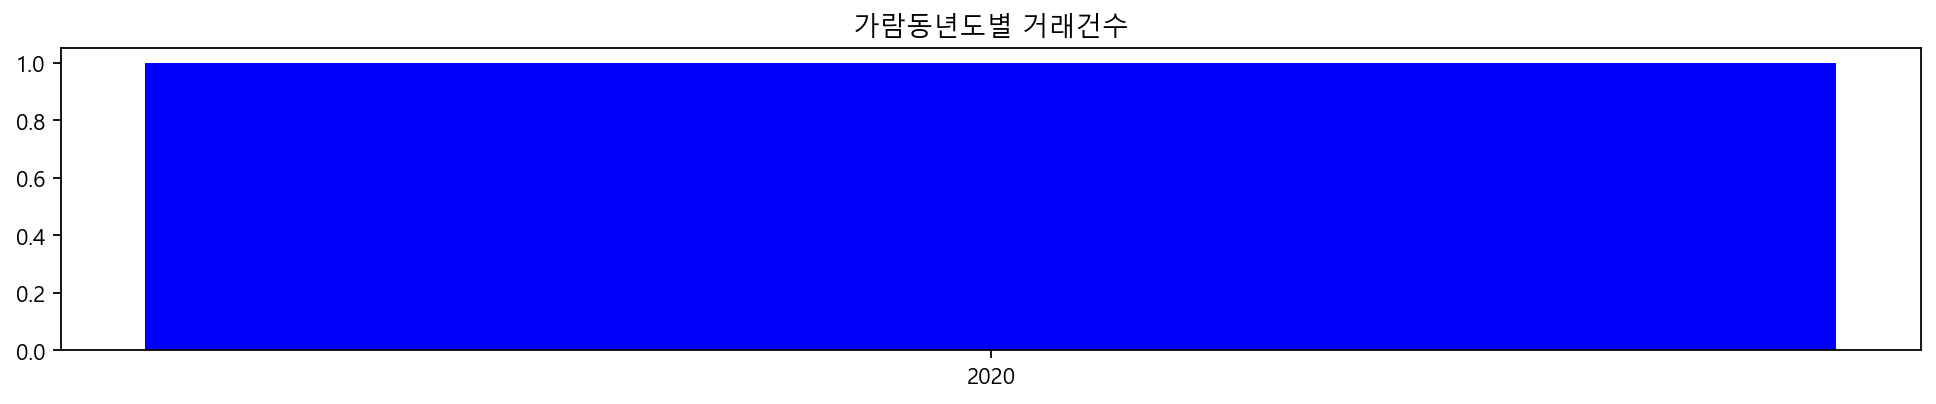

In [151]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)
dong_all=data['읍면동'].unique()
dong_all=list(dong_all)
for dong_one in dong_all:
    new=data[data['읍면동']==dong_one]
    group_new=new.groupby(['계약년']).count()
    x=group_new['계약년월'].index
    y=group_new['계약년월'].values
    plt.figure(figsize=(15,2.5),dpi=160)
    plt.bar(x,y,width=0.5,color="blue")
    a=dong_one+'년도별 거래건수'
    plt.title(a)
    plt.savefig(a+'.png')

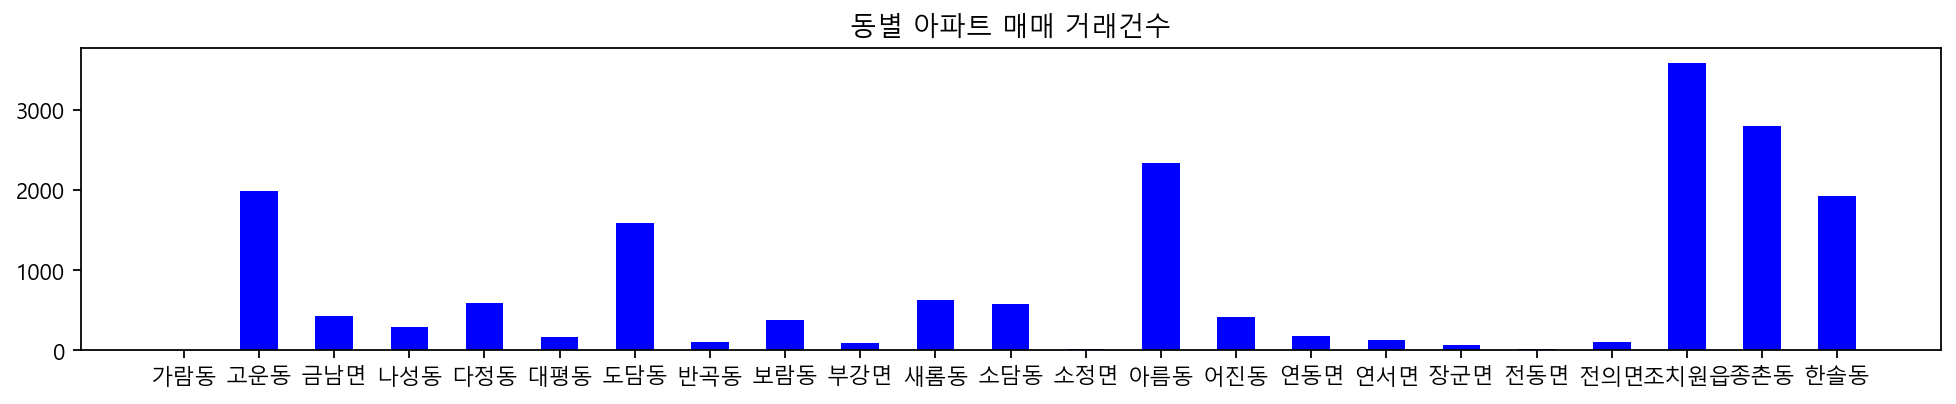

In [6]:
up=data.groupby('읍면동').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 아파트 매매 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [69]:
def riri(df):
    return int(float(df.replace(',','')))
data['거래금액(만원)'] =data['거래금액(만원)'].apply(riri)

In [8]:
up=data.groupby('읍면동').mean()
up

,계약년월,계약일,부번,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일
읍면동,,,,,,,,
가람동,202006.000000,12.000000,0.000000,59.933100,54000.000000,5.000000,2017.000000,NaN
고운동,201894.597782,15.607359,0.000000,75.812906,34431.779738,10.310988,2015.162298,2.020095e+07
금남면,201852.902778,15.502315,0.000000,52.873269,13959.120370,7.951389,2001.199074,2.020069e+07
나성동,201890.462069,15.962069,0.000000,27.205074,10585.482759,5.682759,2015.096552,2.020077e+07
다정동,201980.471284,16.170608,0.000000,81.698369,62177.157095,9.966216,2018.030405,2.020112e+07
대평동,201965.556886,15.988024,1.149701,84.745504,73175.011976,10.574850,2017.778443,2.020199e+07
도담동,201870.839522,15.285714,0.000000,74.161839,44911.933291,10.904342,2014.454374,2.020077e+07
반곡동,202004.854369,15.563107,2.640777,77.063544,57494.951456,8.067961,2019.000000,2.020212e+07
보람동,201963.273684,15.668421,0.165789,84.261626,65879.284211,10.589474,2016.876316,2.020116e+07


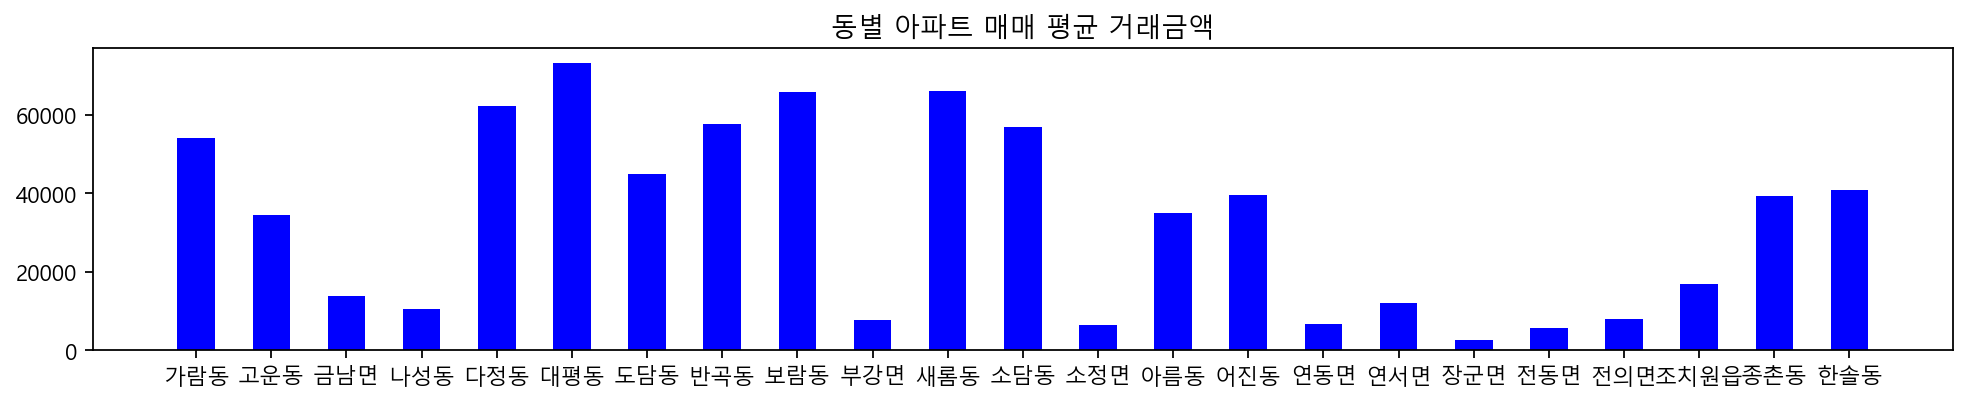

In [9]:
up=data.groupby('읍면동').mean()
x=up.index
y=up['거래금액(만원)']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 아파트 매매 평균 거래금액'
plt.title(a)
plt.savefig(a+'.png')

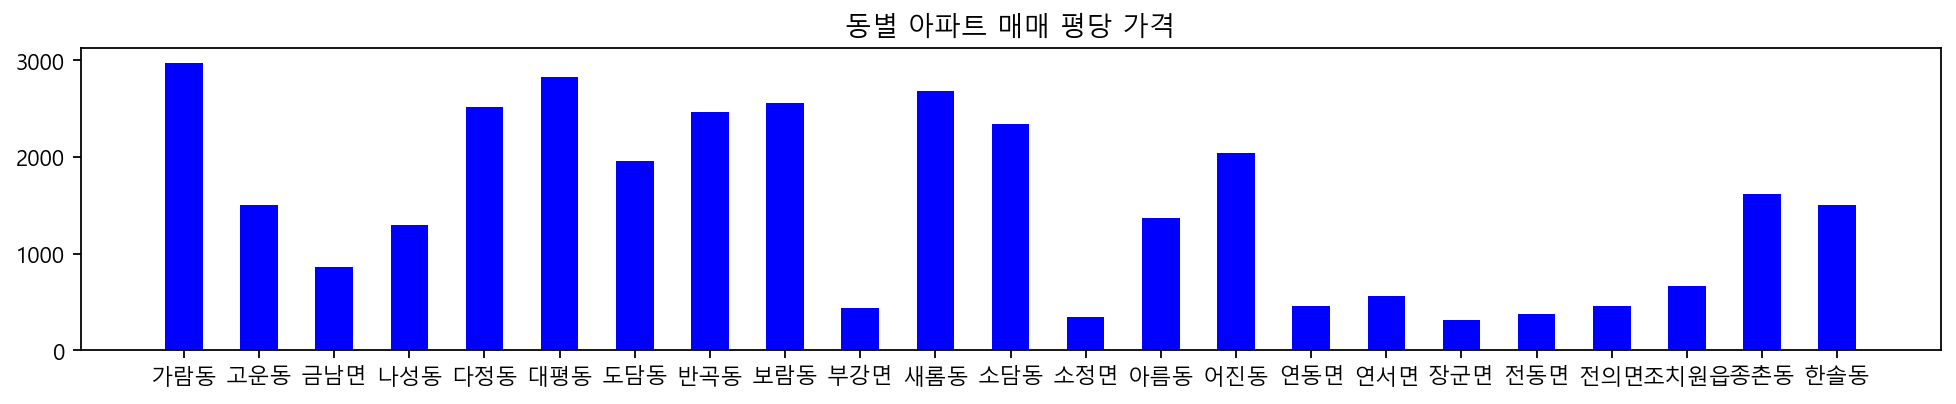

In [10]:
data['평평']=data['전용면적(㎡)']/3.3
data['평당 가격(만원)']=data['거래금액(만원)']/data['평평']
up=data.groupby('읍면동').mean()
x=up.index
y=up['평당 가격(만원)']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 아파트 매매 평당 가격'
plt.title(a)
plt.savefig(a+'.png')

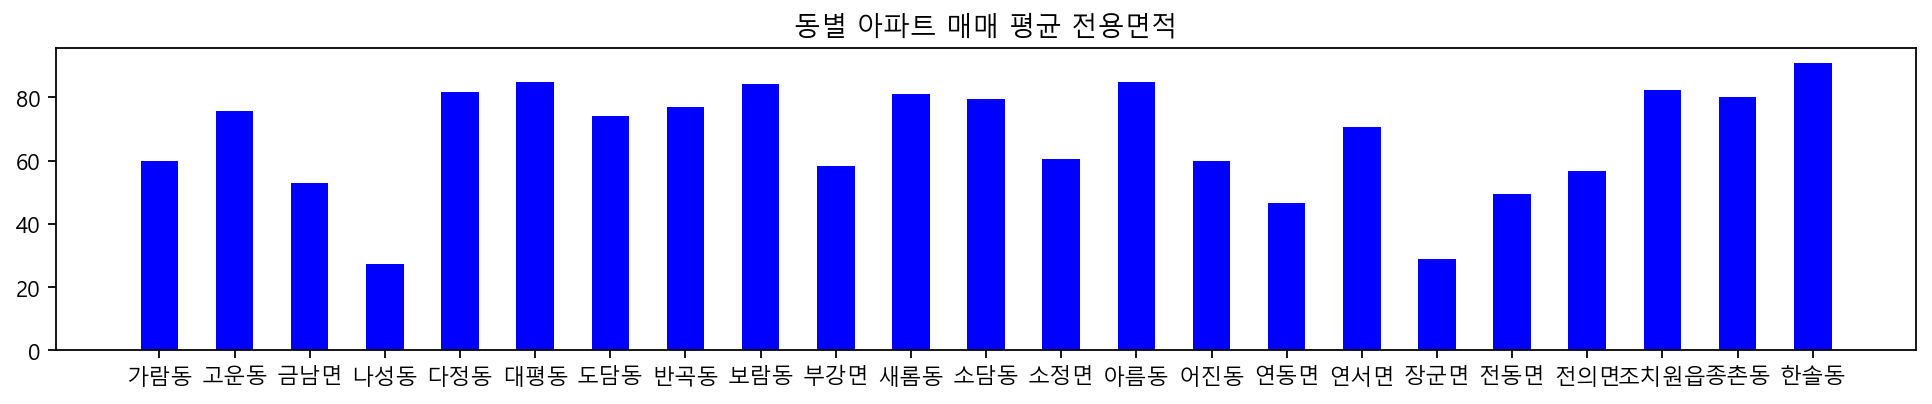

In [11]:
up=data.groupby('읍면동').mean()
x=up.index
y=up['전용면적(㎡)']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 아파트 매매 평균 전용면적'
plt.title(a)
plt.savefig(a+'.png')

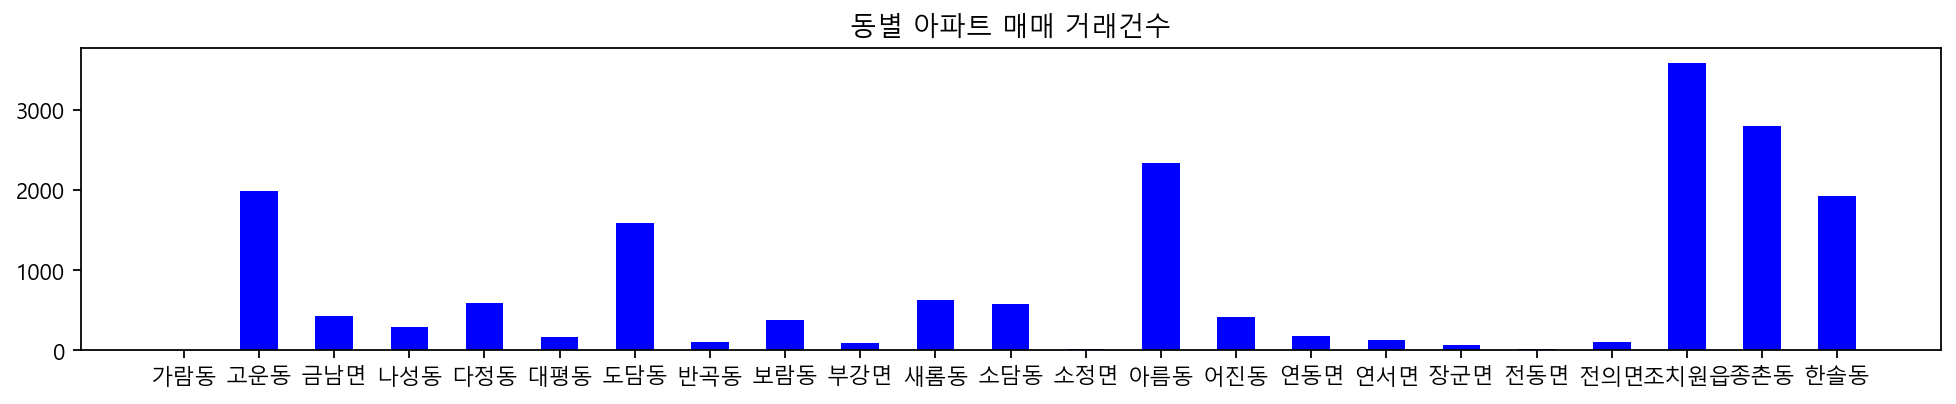

In [12]:
up=data.groupby('읍면동').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 아파트 매매 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [13]:
na=data[data['읍면동']=='나성동']
na

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,읍면동구분,읍면동,평평,평당 가격(만원)
27,201701,19,세종특별자치시 나성동,759,0,블루지움(2-4),45.1500,14700,5,2015,NaN,동,나성동,13.681818,1074.418605
28,201701,16,세종특별자치시 나성동,750,0,세종마루(CB5-3BL),24.3850,12000,8,2015,NaN,동,나성동,7.389394,1623.949149
29,201701,24,세종특별자치시 나성동,732,0,세종모닝시티2차,23.2849,11020,7,2016,NaN,동,나성동,7.056030,1561.784676
30,201701,18,세종특별자치시 나성동,712,0,세종퍼스트타워,28.0070,8900,4,2013,NaN,동,나성동,8.486970,1048.666405
31,201701,7,세종특별자치시 나성동,714,0,에스알파크,35.1930,12900,7,2014,NaN,동,나성동,10.664545,1209.615549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18185,202010,31,세종특별자치시 나성동,714,0,에스알파크,35.1933,11800,7,2014,NaN,동,나성동,10.664636,1106.460605
18186,202010,14,세종특별자치시 나성동,730,0,에스알파크시티,32.3600,14500,7,2017,NaN,동,나성동,9.806061,1478.677379
18187,202010,21,세종특별자치시 나성동,737,0,포레뷰투도시형생활주택,27.4996,10000,4,2017,NaN,동,나성동,8.333212,1200.017455
18188,202010,5,세종특별자치시 나성동,748,0,한스웰시티(CB5-1BL),26.7400,9200,5,2015,NaN,동,나성동,8.103030,1135.377711


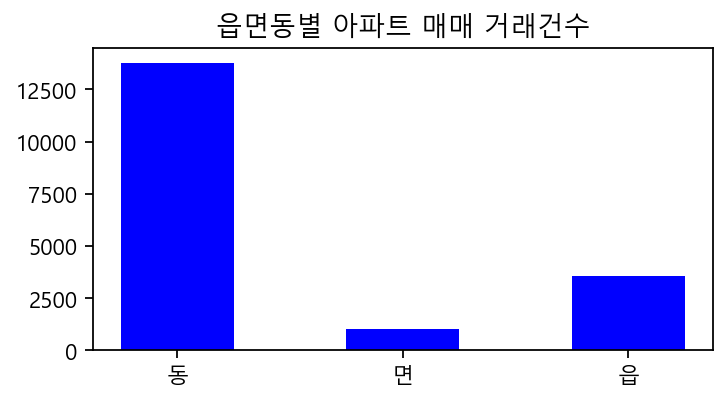

In [14]:
up=data.groupby('읍면동구분').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 아파트 매매 거래건수'
plt.title(a)
plt.savefig(a+'.png')

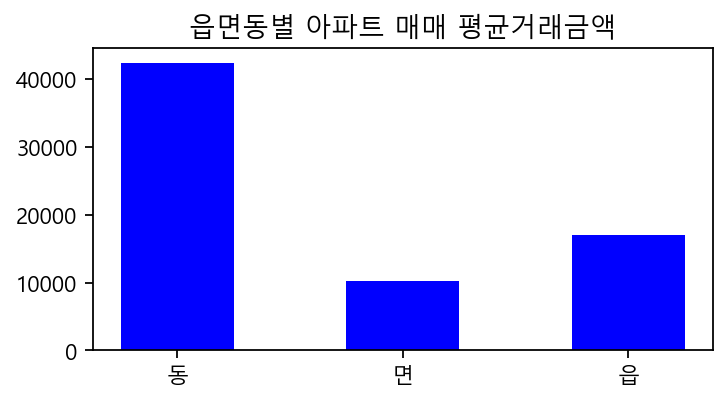

In [15]:
up=data.groupby('읍면동구분').mean()
x=up.index
y=up['거래금액(만원)']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 아파트 매매 평균거래금액'
plt.title(a)
plt.savefig(a+'.png')

In [16]:
sort_data=data.sort_values(by=['계약년월','계약일'])

In [18]:
goun=sort_data[sort_data['읍면동']=='금남면']
goun[goun['계약년월']=='201901']

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,읍면동구분,읍면동,평평,평당 가격(만원)


### 아파트 전용면적 별 거래 수

In [17]:
sort_data['전용면적(㎡)'] =sort_data['전용면적(㎡)'].astype(int)
sort_data_g=sort_data.groupby(by=['전용면적(㎡)'], as_index=False).count()
sort_data_g=sort_data_g.sort_values(by='계약년월',ascending=False)[:10]

In [18]:
sort_data_g

,전용면적(㎡),계약년월,계약일,시군구,본번,부번,단지명,거래금액(만원),층,건축년도,해제사유발생일,읍면동구분,읍면동,평평,평당 가격(만원)
57,84,7880,7880,7880,7880,7880,7880,7880,7880,7880,172,7880,7880,7880,7880
38,59,3729,3729,3729,3729,3729,3729,3729,3729,3729,114,3729,3729,3729,3729
49,74,608,608,608,608,608,608,608,608,608,8,608,608,608,608
63,99,417,417,417,417,417,417,417,417,417,12,417,417,417,417
77,114,354,354,354,354,354,354,354,354,354,2,354,354,354,354
65,101,329,329,329,329,329,329,329,329,329,13,329,329,329,329
27,43,300,300,300,300,300,300,300,300,300,5,300,300,300,300
60,96,270,270,270,270,270,270,270,270,270,7,270,270,270,270
32,49,265,265,265,265,265,265,265,265,265,3,265,265,265,265
24,39,256,256,256,256,256,256,256,256,256,14,256,256,256,256


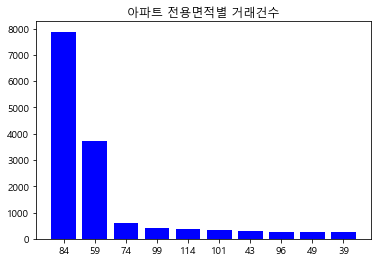

In [19]:
sort_data_g['전용면적(㎡)'] =sort_data_g['전용면적(㎡)'].astype(str)
x=sort_data_g['전용면적(㎡)']
y=sort_data_g['계약년월']
#plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,color="blue")
a='아파트 전용면적별 거래건수'
plt.title(a)
plt.savefig(a+'.png')

### 아파트 금액별 거래 수(제일 잘 팔리는 금액대)

In [20]:
sort_data_m=sort_data.groupby(by=['거래금액(만원)'], as_index=False).count()
sort_data_m=sort_data_m.sort_values(by='계약년월',ascending=False)[:10]
sort_data_m

,거래금액(만원),계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),층,건축년도,해제사유발생일,읍면동구분,읍면동,평평,평당 가격(만원)
463,25000,687,687,687,687,687,687,687,687,687,1,687,687,687,687
779,40000,232,232,232,232,232,232,232,232,232,9,232,232,232,232
642,33000,218,218,218,218,218,218,218,218,218,5,218,218,218,218
685,35000,213,213,213,213,213,213,213,213,213,3,213,213,213,213
621,32000,213,213,213,213,213,213,213,213,213,1,213,213,213,213
813,42000,190,190,190,190,190,190,190,190,190,8,190,190,190,190
937,50000,172,172,172,172,172,172,172,172,172,9,172,172,172,172
602,31000,166,166,166,166,166,166,166,166,166,4,166,166,166,166
861,45000,164,164,164,164,164,164,164,164,164,2,164,164,164,164
663,34000,158,158,158,158,158,158,158,158,158,1,158,158,158,158


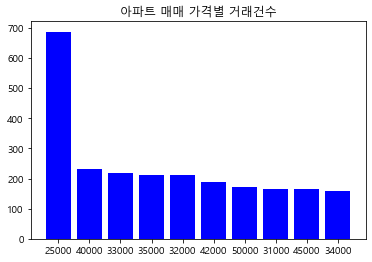

In [21]:
sort_data_m['거래금액(만원)'] =sort_data_m['거래금액(만원)'].astype(str)
x=sort_data_m['거래금액(만원)']
y=sort_data_m['계약년월']
#plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,color="blue")
a='아파트 매매 가격별 거래건수'
plt.title(a)
plt.savefig(a+'.png')

In [22]:
maxpr=np.max(sort_data['거래금액(만원)'])
maxpr

157000

In [23]:
minpr=np.min(sort_data['거래금액(만원)'])
minpr

1800

In [24]:
sort_data[sort_data['거래금액(만원)']==maxpr]

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,읍면동구분,읍면동,평평,평당 가격(만원)
17377,202008,3,세종특별자치시 보람동,713,0,호려울마을10단지(중흥S클래스),109,157000,20,2016,NaN,동,보람동,33.324,4711.319169


In [25]:
sort_data[sort_data['거래금액(만원)']==minpr]

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,읍면동구분,읍면동,평평,평당 가격(만원)
101,201701,10,세종특별자치시 장군면 금암리,259,1,정보마을,28,1800,4,2002,NaN,면,장군면,8.564121,210.179183
102,201701,10,세종특별자치시 장군면 금암리,259,1,정보마을,28,1800,4,2002,NaN,면,장군면,8.564121,210.179183
103,201701,10,세종특별자치시 장군면 금암리,259,1,정보마을,28,1800,4,2002,NaN,면,장군면,8.564121,210.179183
104,201701,10,세종특별자치시 장군면 금암리,259,1,정보마을,28,1800,4,2002,NaN,면,장군면,8.564121,210.179183
105,201701,10,세종특별자치시 장군면 금암리,259,1,정보마을,28,1800,4,2002,NaN,면,장군면,8.564121,210.179183


In [70]:
def pyeong(df):
    if df< 33:
        return '10평 미만'
    elif df>= 33 and df < 66:
        return '10~20평'
    elif df>= 66 and df < 99:
        return '20~30평'
    elif df>= 99 and df < 132:
        return '30~40평'
    elif df>= 132 and df < 165:
        return '40~50평'
    elif df>= 165 and df < 198:
        return '50~60평'
    else:
        return '60평 이상'

In [71]:
data["평"]=data["전용면적(㎡)"].apply(pyeong)

In [29]:
up=data.groupby('평').count()

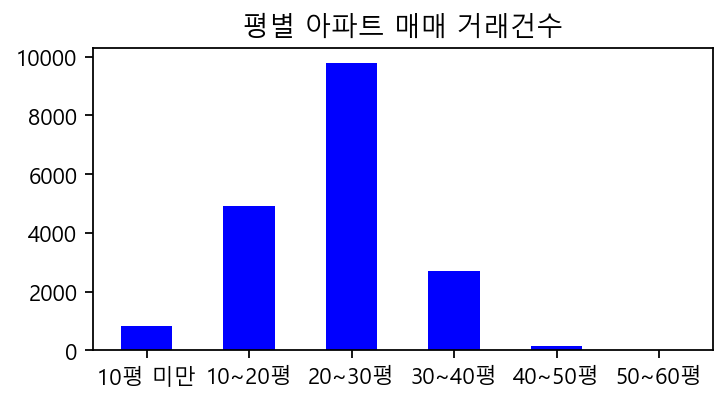

In [30]:
up=data.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 아파트 매매 거래건수'
plt.title(a)
plt.savefig(a+'.png')

<AxesSubplot:>

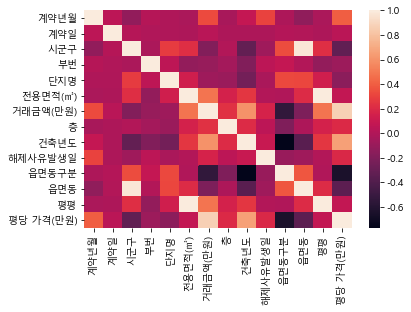

In [31]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
labelencoder_x= LabelEncoder()
y = data["시군구"]
data["시군구"]=labelencoder_x.fit_transform(y)
y = data["단지명"]
data["단지명"]=labelencoder_x.fit_transform(y)
y = data["읍면동구분"]
data["읍면동구분"]=labelencoder_x.fit_transform(y)
y = data["읍면동"]
data["읍면동"]=labelencoder_x.fit_transform(y)
sns.heatmap(data.corr())

In [32]:
toto=data.corr()
toto['거래금액(만원)']

계약년월         0.331752
계약일          0.035568
시군구         -0.186824
부번          -0.099560
단지명         -0.071522
전용면적(㎡)      0.483079
거래금액(만원)     1.000000
층            0.235347
건축년도         0.601592
해제사유발생일      0.165393
읍면동구분       -0.534140
읍면동         -0.205209
평평           0.483079
평당 가격(만원)    0.875164
Name: 거래금액(만원), dtype: float64

### 연립 다주택

In [72]:
yata = pd.read_csv('4.세종시_연립다세대(매매)_실거래가.csv')
yata["평"]=yata["전용면적(㎡)"].apply(pyeong)
yata

,계약년월,계약일,시군구,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,평
0,201701,18,세종특별자치시 전의면 관정리,262,6,홍성맨션3차,53.965,77.15,"4,300",4,2002,NaN,10~20평
1,201701,26,세종특별자치시 조치원읍 서창리,140,11,삼현빌라,48.530,37.30,"4,000",2,1989,NaN,10~20평
2,201701,3,세종특별자치시 조치원읍 원리,132,7,고려1동,62.080,36.31,"4,700",2,1983,NaN,10~20평
3,201701,13,세종특별자치시 조치원읍 침산리,167,6,용성빌라,64.230,42.25,"6,500",2,1991,NaN,10~20평
4,201702,1,세종특별자치시 조치원읍 신흥리,106,0,주공연립,67.900,133.43,"12,800",1,1984,NaN,20~30평
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,202010,14,세종특별자치시 조치원읍 신흥리,24,3,신흥연립,70.420,39.26,"5,000",2,1982,NaN,20~30평
542,202010,8,세종특별자치시 조치원읍 신흥리,106,0,주공연립,55.350,108.78,"20,700",3,1984,NaN,10~20평
543,202010,20,세종특별자치시 조치원읍 신흥리,106,0,주공연립,57.510,113.04,"22,500",3,1984,NaN,10~20평
544,202010,22,세종특별자치시 조치원읍 침산리,148,3,고려,76.320,53.75,"9,800",1,1986,NaN,20~30평


In [73]:
yata['읍면동구분']=yata['시군구'].apply(sort_dong)
yata['읍면동']=yata['시군구'].apply(sort_dong2)

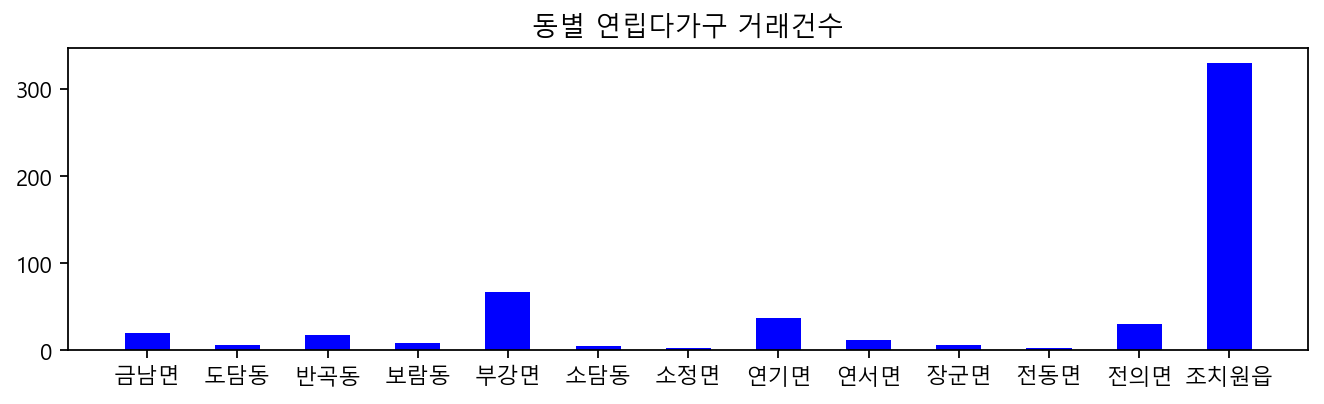

In [35]:
up=yata.groupby('읍면동').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(10,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 연립다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

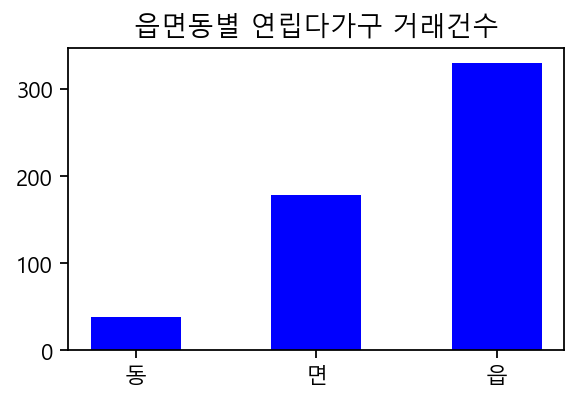

In [36]:
up=yata.groupby('읍면동구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(4,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 연립다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

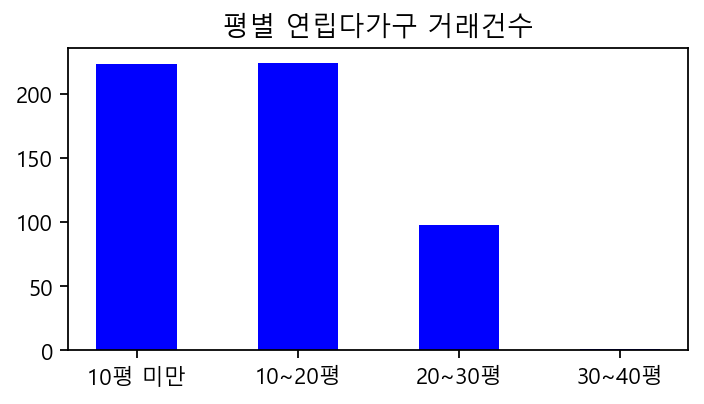

In [37]:
up=yata.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 연립다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

### 단독다가구 - 전용면적 없음

In [74]:
danta = pd.read_csv('5.세종시_단독다가구(매매)_실거래가.csv')
danta["평"]=danta["연면적(㎡)"].apply(pyeong)

In [75]:
danta['읍면동구분']=danta['시군구'].apply(sort_dong)
danta['읍면동']=danta['시군구'].apply(sort_dong2)

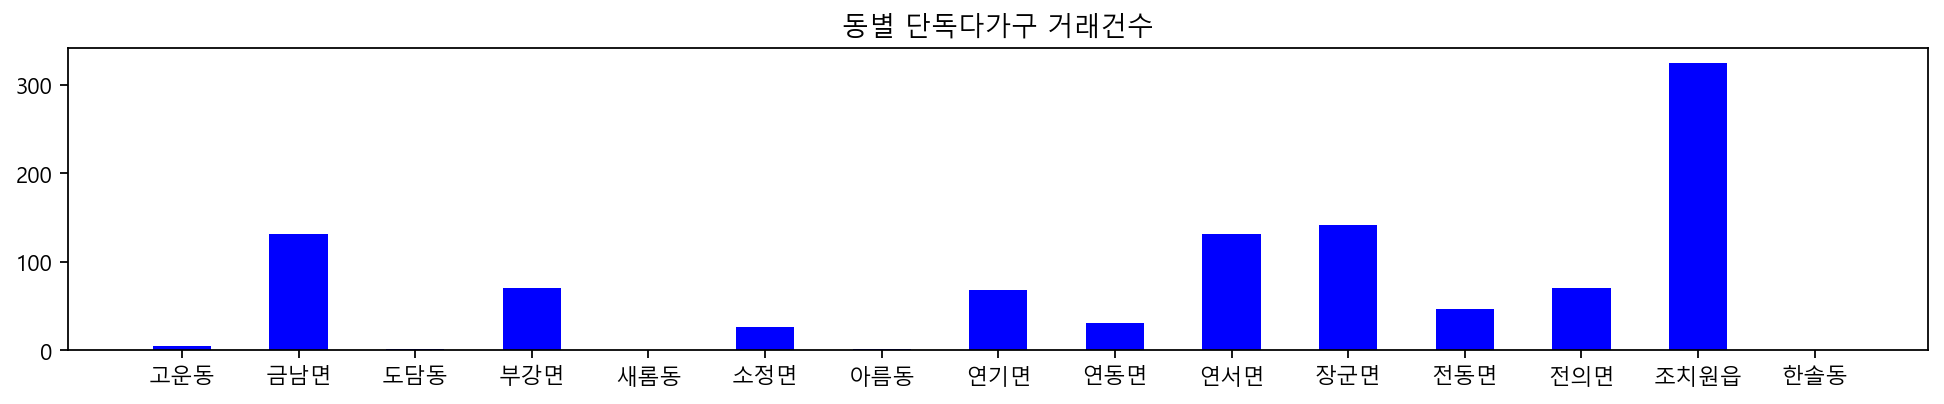

In [41]:
up=danta.groupby('읍면동').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 단독다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

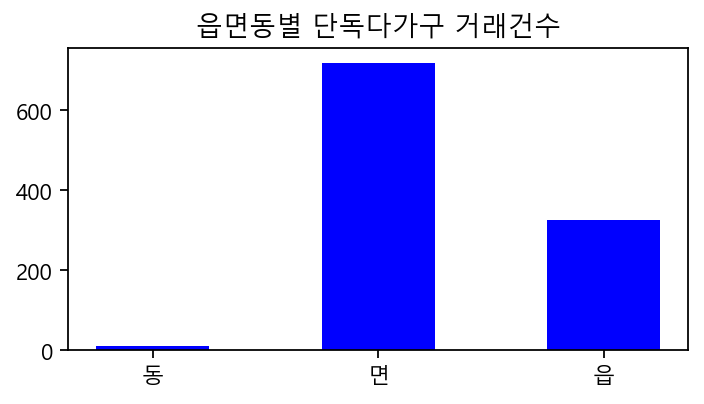

In [42]:
up=danta.groupby('읍면동구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 단독다가구 거래건수'
plt.title(a)
plt.savefig(a+'.png')

<BarContainer object of 6 artists>

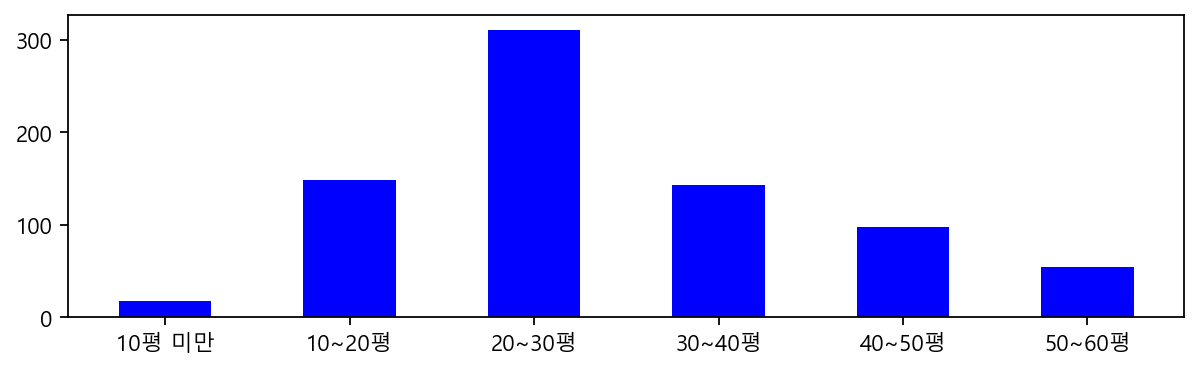

In [43]:
up=danta.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(9,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")

In [44]:
def rep(df):
    if df == '-':
        return 0
    elif df.find('m이상') != -1:
        return df.replace('m이상','')
    else:
        return df.replace('m미만','')

In [45]:
danta["도로"]=danta["도로조건"].apply(rep)

In [46]:
def riri(df):
    return int(float(df.replace(',','')))

In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x= LabelEncoder()
y = danta["시군구"]
danta["시군구2"]=labelencoder_x.fit_transform(y)
z = danta["주택유형"]
danta["주택유형2"]=labelencoder_x.fit_transform(z)
danta['거래금액2(만원)']= danta['거래금액(만원)'].apply(riri)

In [48]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [49]:
danta_null=danta[danta['건축년도'].isnull()]

In [50]:
#null 값이 아닌 것만 뽑아오기
idx_not=danta[danta['건축년도'].isnull()].index
danta_notnull=danta.drop(idx_not)

In [51]:
X = danta_notnull[["계약년월","연면적(㎡)","대지면적(㎡)","거래금액2(만원)","도로","시군구2","주택유형2"]]
y = danta_notnull['건축년도']

In [52]:
lm.fit(X,y)

LinearRegression()

In [53]:
X2 = danta_null[["계약년월","연면적(㎡)","대지면적(㎡)","거래금액2(만원)","도로","시군구2","주택유형2"]]

In [55]:
predictions = lm.predict(X2)
predictions=predictions.astype(int)

In [56]:
#적용 완료
for i in range(len(danta_null.index)):
    danta.loc[ danta_null.index[i] , "건축년도" ]=int(predictions[i])

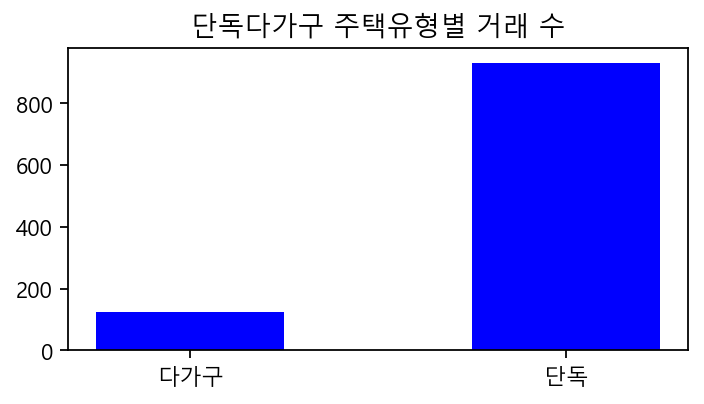

In [57]:
up=danta.groupby('주택유형').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='단독다가구 주택유형별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

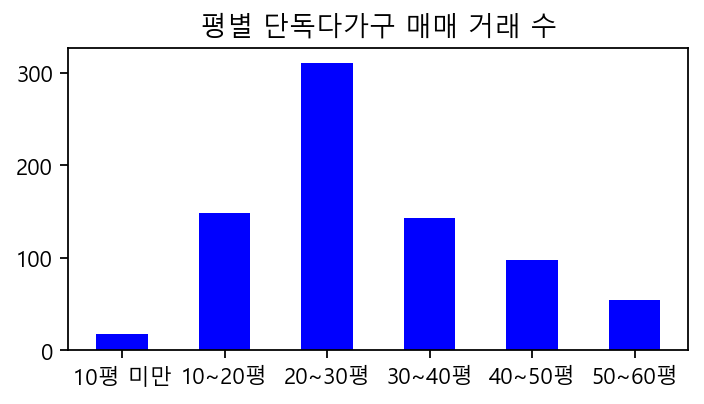

In [58]:
up =danta.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 단독다가구 매매 거래 수'
plt.title(a)
plt.savefig(a+'.png')

### 오피스텔

In [76]:
oata = pd.read_csv('6.세종시_오피스텔(매매)_실거래가.csv')
oata["평"]=oata["전용면적(㎡)"].apply(pyeong)

In [77]:
oata['읍면동구분']=oata['시군구'].apply(sort_dong)
oata['읍면동']=oata['시군구'].apply(sort_dong2)

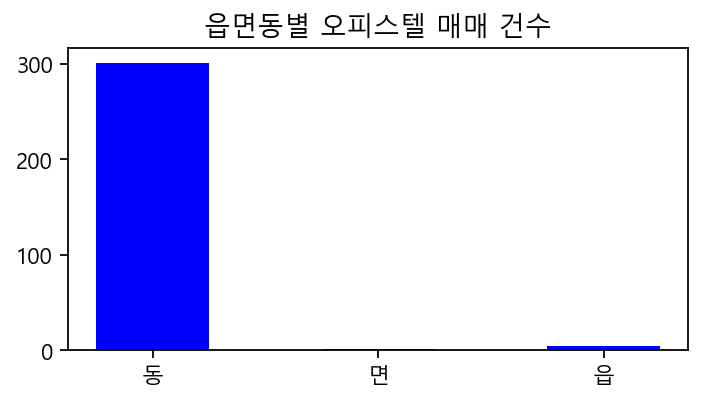

In [61]:
up=oata.groupby('읍면동구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 오피스텔 매매 건수'
plt.title(a)
plt.savefig(a+'.png')

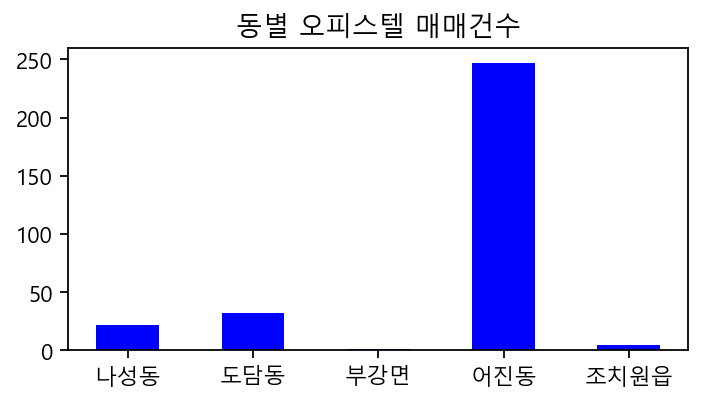

In [62]:
up=oata.groupby('읍면동').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 오피스텔 매매건수'
plt.title(a)
plt.savefig(a+'.png')

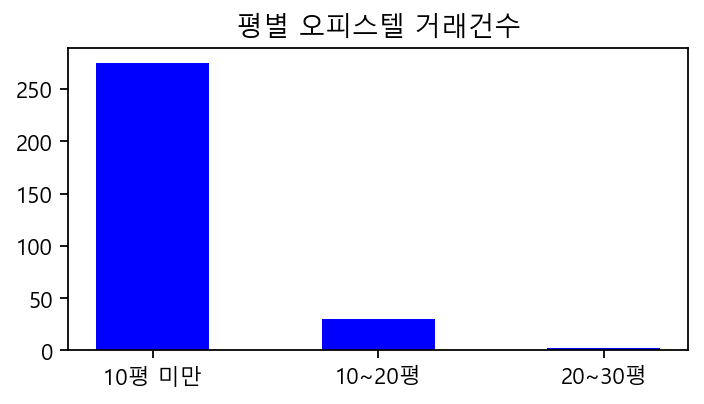

In [63]:
up=oata.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 오피스텔 거래건수'
plt.title(a)
plt.savefig(a+'.png')

### 매매 총 합

In [78]:
data_all = pd.concat([data,yata,danta,oata], ignore_index=True)
data_all

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,읍면동구분,읍면동,평,건물명,대지권면적(㎡),주택유형,도로조건,연면적(㎡),대지면적(㎡)
0,201701,19,세종특별자치시 고운동,1401,0.0,가락마을13단지(대광로제비앙),59.6550,23000,11.0,2015.0,NaN,동,고운동,10~20평,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,2,세종특별자치시 고운동,1393,0.0,가락마을15단지(중흥파크뷰),84.9894,32000,3.0,2015.0,NaN,동,고운동,20~30평,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,14,세종특별자치시 고운동,1395,0.0,가락마을16단지(에듀그린),84.8788,32500,21.0,2015.0,NaN,동,고운동,20~30평,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,9,세종특별자치시 고운동,1386,0.0,가락마을17단지(골드클래스),59.9159,25100,7.0,2015.0,NaN,동,고운동,10~20평,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,9,세종특별자치시 고운동,1390,0.0,가락마을21단지(에듀포레),99.9434,32250,3.0,2015.0,NaN,동,고운동,30~40평,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20312,202010,23,세종특별자치시 어진동,0,0.0,푸르지오시티,22.4200,"7,950",12.0,2014.0,NaN,동,어진동,10평 미만,NaN,NaN,NaN,NaN,NaN,NaN
20313,202010,24,세종특별자치시 어진동,0,0.0,푸르지오시티,22.4200,"7,900",5.0,2014.0,NaN,동,어진동,10평 미만,NaN,NaN,NaN,NaN,NaN,NaN
20314,202010,24,세종특별자치시 어진동,0,0.0,푸르지오시티,23.7400,"8,000",15.0,2014.0,NaN,동,어진동,10평 미만,NaN,NaN,NaN,NaN,NaN,NaN
20315,202010,30,세종특별자치시 어진동,0,0.0,푸르지오시티,22.4200,"7,950",16.0,2014.0,NaN,동,어진동,10평 미만,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
data_all['읍면동구분']=data_all['시군구'].apply(sort_dong)
data_all['읍면동']=data_all['시군구'].apply(sort_dong2)

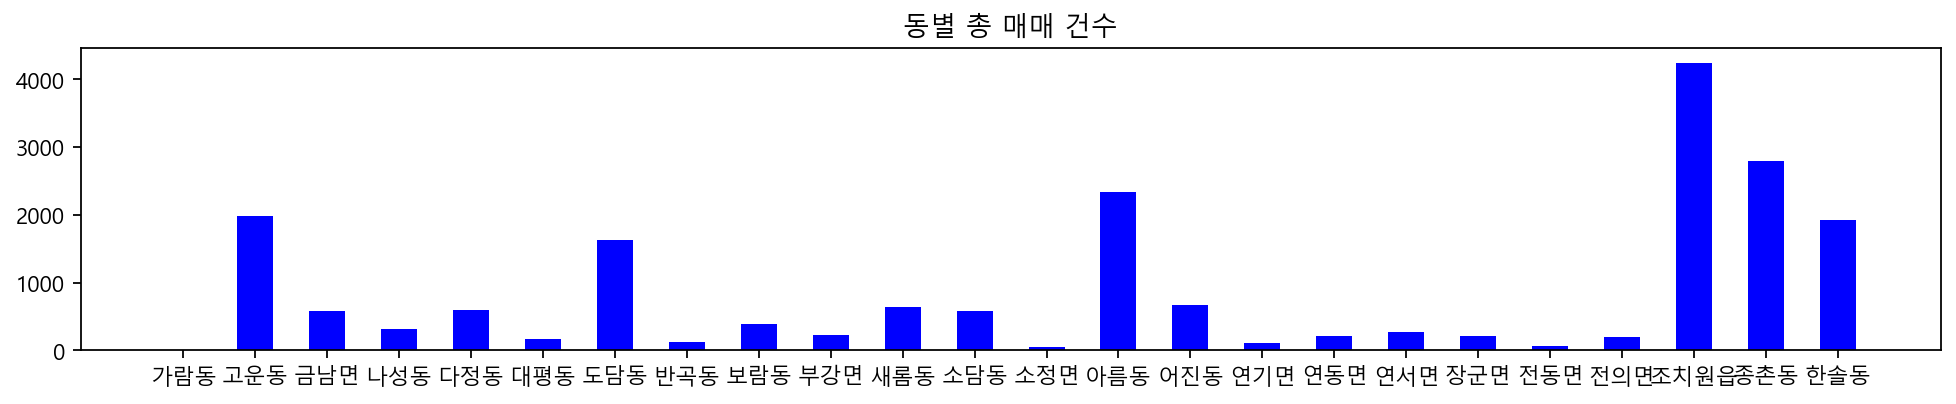

In [80]:
up=data_all.groupby('읍면동').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(15,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='동별 총 매매 건수'
plt.title(a)
plt.savefig(a+'.png')

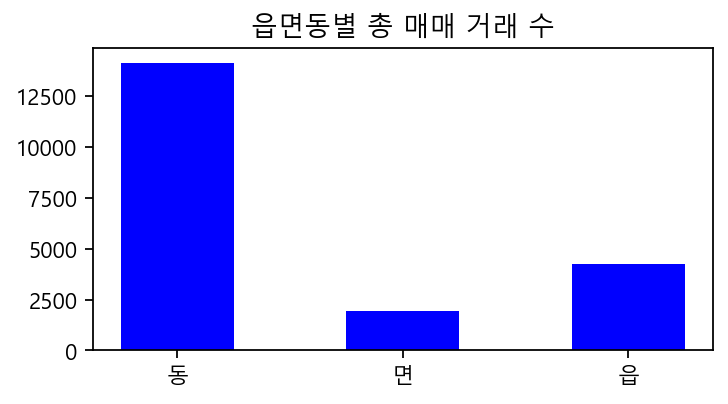

In [81]:
up=data_all.groupby('읍면동구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='읍면동별 총 매매 거래 수'
plt.title(a)
plt.savefig(a+'.png')

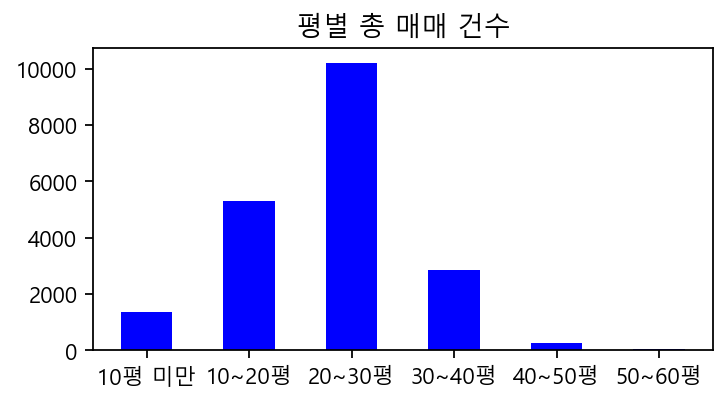

In [82]:
up=data_all.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 총 매매 건수'
plt.title(a)
plt.savefig(a+'.png')

## 매매로 세종시로 오는 이사건 수

In [84]:
data_all['계약년월'] =data_all['계약년월'].astype(str)
tt1=data_all.groupby('계약년월').count()

In [ ]:
tt1=data_all.groupby('계약년월').count()
plt.plot(tt1.index,tt1['계약일'])
plt.figure(figsize=(15,2.5),dpi=160)
plt.axis([0, 5, 0, 1700])

### 달별 매매 이사건수(2020년 11월 12월 데이터 없음) 

In [85]:
def mon(df):
    return df[-2:]

In [86]:
def year(df):
    return df[:-2]
data['계약년월']=data['계약년월'].astype(str)
data['계약년']=data['계약년월'].apply(year)

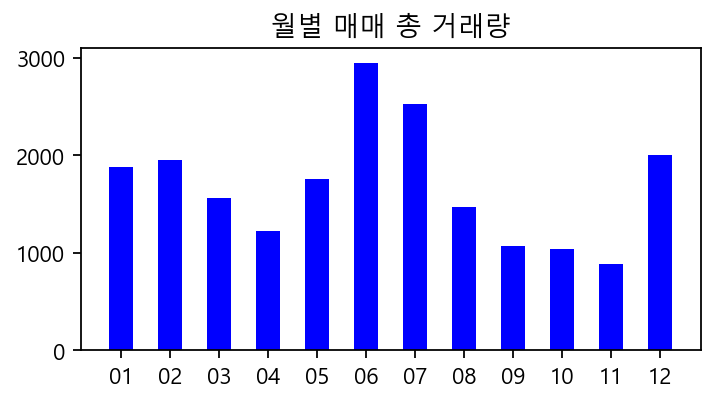

In [87]:
data_all['계약년월']=data_all['계약년월'].astype(str)
data_all['계약월']=data_all['계약년월'].apply(mon)
tt2=data_all.groupby('계약월').count()
x=tt2.index
y=tt2['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='월별 매매 총 거래량'
plt.title(a)
plt.savefig(a+'.png')

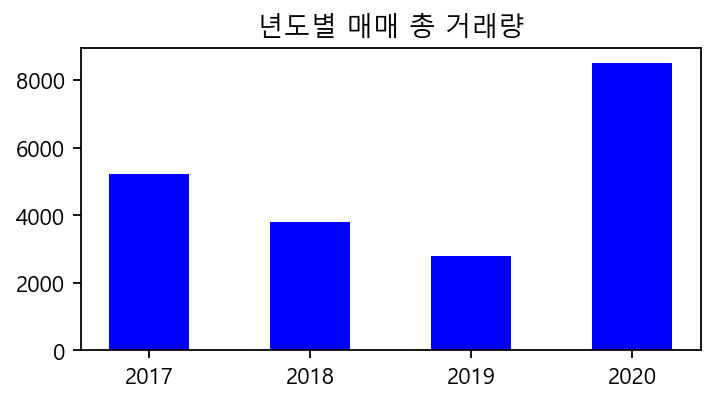

In [88]:
data_all['계약년']=data_all['계약년월'].apply(year)
tt2_1=data_all.groupby('계약년').count()
x=tt2_1.index
y=tt2_1['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='년도별 매매 총 거래량'
plt.title(a)
plt.savefig(a+'.png')

### 아파트 전월세

In [140]:
data_jeon = pd.read_csv('7.세종시_아파트(전월세)_실거래가.csv')
data_jeon["평"]=data_jeon["전용면적(㎡)"].apply(pyeong)

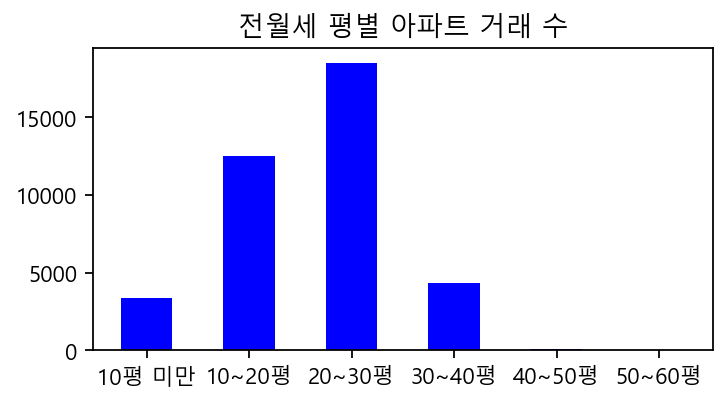

In [143]:
up=data_jeon.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='전월세 평별 아파트 거래 수'
plt.title(a)
plt.savefig(a+'.png')

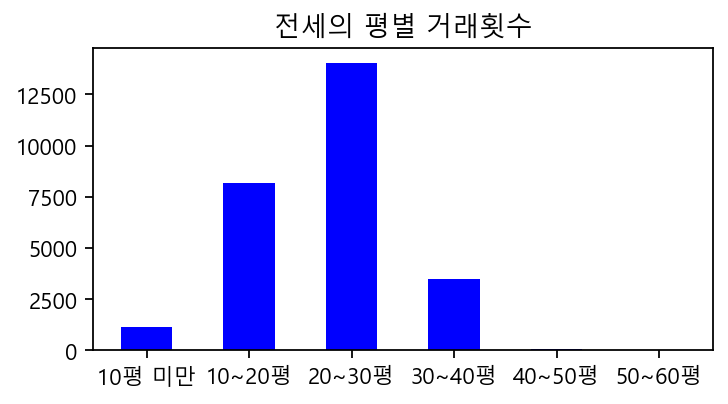

In [141]:
data_jeon2=data_jeon[data_jeon['전월세구분']=='전세']
up=data_jeon2.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='전세의 평별 거래횟수'
plt.title(a)
plt.savefig(a+'.png')

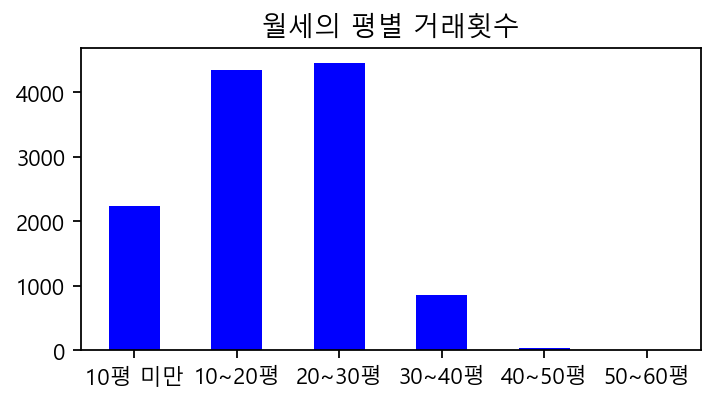

In [142]:
data_jeon2=data_jeon[data_jeon['전월세구분']=='월세']
up=data_jeon2.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='월세의 평별 거래횟수'
plt.title(a)
plt.savefig(a+'.png')

In [93]:
#### 이거 전세가액 구하는 공식
data_jeon2=data_jeon[data_jeon['전월세구분']=='전세']
all_data2 = pd.merge(left=data,right=data_jeon2,how='left',on=["계약년월",'시군구','단지명','전용면적(㎡)'],sort=False)
idx_not=all_data2[all_data2['계약일_y'].isnull()].index
all_data2_notnull=all_data2.drop(idx_not)
all_data2_notnull['보증금(만원)']=all_data2_notnull['보증금(만원)'].apply(riri)
all_data2_notnull['전세가율']=(all_data2_notnull['보증금(만원)']/all_data2_notnull['거래금액(만원)'])*100
#all_data2_notnull.groupby('계약년월').mean()

In [94]:
all_data2 = pd.merge(left=data,right=data_jeon2,how='left',on=["계약년월",'시군구','단지명','전용면적(㎡)'],sort=False)

In [95]:
idx_not=all_data2[all_data2['계약일_y'].isnull()].index
all_data2_notnull=all_data2.drop(idx_not)
#all_data2_notnull

In [96]:
all_data2_notnull['보증금(만원)']=all_data2_notnull['보증금(만원)'].apply(riri)
all_data2_notnull['전세가율']=(all_data2_notnull['보증금(만원)']/all_data2_notnull['거래금액(만원)'])*100

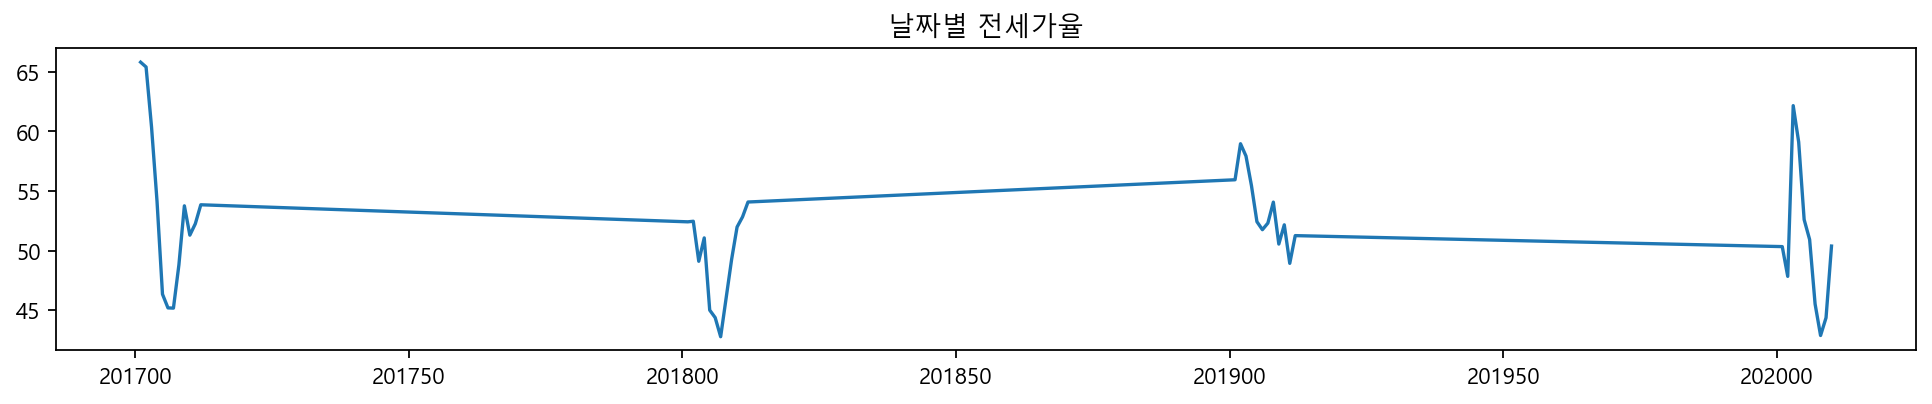

In [97]:
tt1=all_data2_notnull.groupby('계약년월').mean()
plt.figure(figsize=(15,2.5),dpi=160)
plt.plot(tt1.index,tt1['전세가율'])
a='날짜별 전세가율'
plt.title(a)
plt.savefig(a+'.png')

In [100]:
apart = pd.concat([data,data_jeon], ignore_index=True)
apart

,계약년월,계약일,시군구,본번,부번,단지명,전용면적(㎡),거래금액(만원),층,건축년도,해제사유발생일,읍면동구분,읍면동,평,전월세구분,보증금(만원),월세(만원)
0,201701,19,세종특별자치시 고운동,1401,0,가락마을13단지(대광로제비앙),59.6550,23000.0,11,2015,NaN,동,고운동,10~20평,NaN,NaN,NaN
1,201701,2,세종특별자치시 고운동,1393,0,가락마을15단지(중흥파크뷰),84.9894,32000.0,3,2015,NaN,동,고운동,20~30평,NaN,NaN,NaN
2,201701,14,세종특별자치시 고운동,1395,0,가락마을16단지(에듀그린),84.8788,32500.0,21,2015,NaN,동,고운동,20~30평,NaN,NaN,NaN
3,201701,9,세종특별자치시 고운동,1386,0,가락마을17단지(골드클래스),59.9159,25100.0,7,2015,NaN,동,고운동,10~20평,NaN,NaN,NaN
4,201701,9,세종특별자치시 고운동,1390,0,가락마을21단지(에듀포레),99.9434,32250.0,3,2015,NaN,동,고운동,30~40평,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57299,202011,21,세종특별자치시 해밀동,6402,1,해밀마을 2단지,102.8300,NaN,5,2020,NaN,NaN,NaN,30~40평,월세,"10,000",100.0
57300,202012,8,세종특별자치시 해밀동,6402,1,해밀마을 2단지,102.5300,NaN,14,2020,NaN,NaN,NaN,30~40평,월세,"10,000",95.0
57301,202012,11,세종특별자치시 해밀동,6402,1,해밀마을 2단지,84.9500,NaN,18,2020,NaN,NaN,NaN,20~30평,전세,"30,000",0.0
57302,202012,12,세종특별자치시 해밀동,6402,1,해밀마을 2단지,84.9500,NaN,18,2020,NaN,NaN,NaN,20~30평,전세,"34,000",0.0


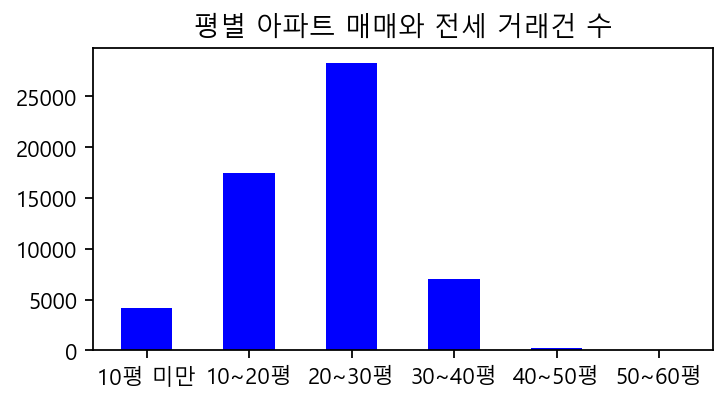

In [101]:
up=apart.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 아파트 매매와 전세 거래건 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=data_jeon.groupby('전월세구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='전월세 구분별 아파트 거래건수'
plt.title(a)
plt.savefig(a+'.png')

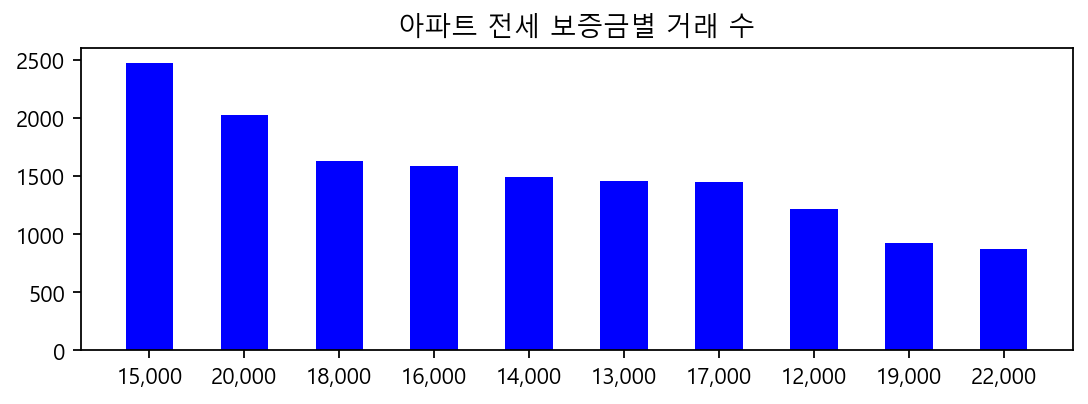

In [103]:
data_jeon=data_jeon[data_jeon['전월세구분']=='전세']
up=data_jeon.groupby('보증금(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(8,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='아파트 전세 보증금별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

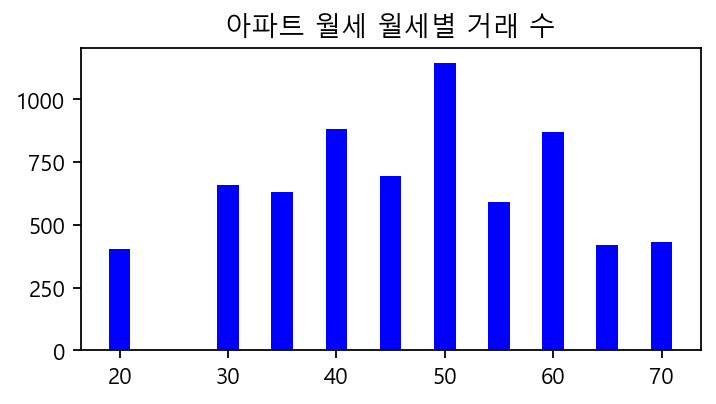

In [108]:
data_jeon=data_jeon[data_jeon['전월세구분']=='월세']
up=data_jeon.groupby('월세(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=2,color="blue")
a='아파트 월세 월세별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

### 연립 전월세

In [110]:
yata_jeon = pd.read_csv('8.세종시_연립다세대(전월세)_실거래가.csv')
yata_jeon["평"]=yata_jeon["전용면적(㎡)"].apply(pyeong)

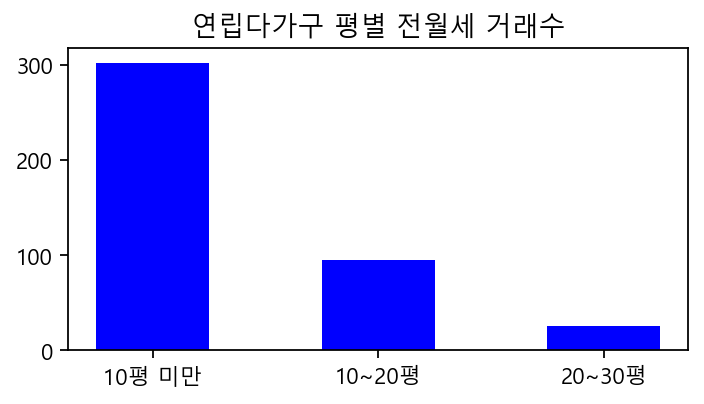

In [111]:
up=yata_jeon.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='연립다가구 평별 전월세 거래수'
plt.title(a)
plt.savefig(a+'.png')

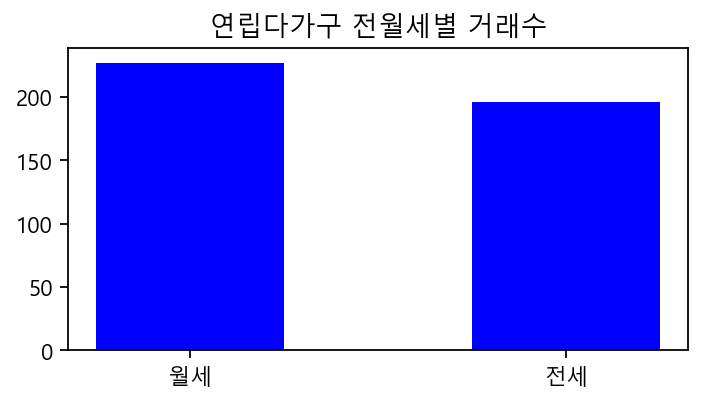

In [112]:
up=yata_jeon.groupby('전월세구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='연립다가구 전월세별 거래수'
plt.title(a)
plt.savefig(a+'.png')

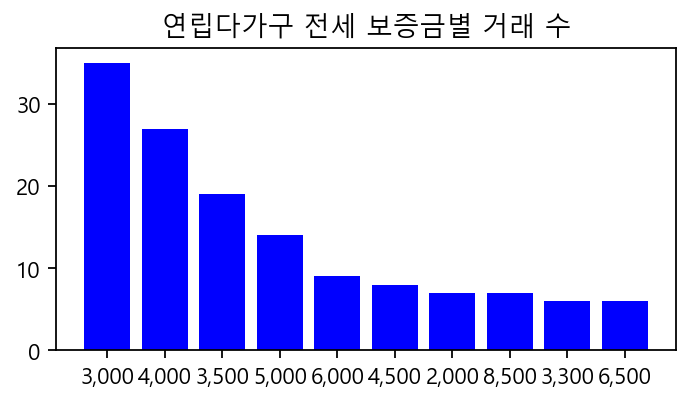

In [116]:
#yata_jeon.groupby('보증금(만원)').count()
up=yata_jeon[yata_jeon['전월세구분']=='전세']
up=up.groupby('보증금(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.8,color="blue")
a='연립다가구 전세 보증금별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

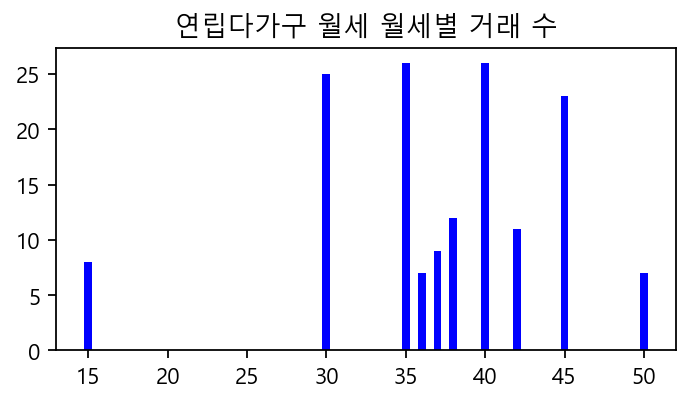

In [117]:
#yata_jeon.groupby('월세(만원)').count()
up=yata_jeon[yata_jeon['전월세구분']=='월세']
up=up.groupby('월세(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='연립다가구 월세 월세별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
yata_jeon2=yata_jeon[yata_jeon['전월세구분']=='전세']
all_yata2 = pd.merge(left=yata,right=yata_jeon2,how='left',on=["계약년월",'시군구','건물명','전용면적(㎡)'],sort=False)
idx_not=all_yata2[all_yata2['계약일_y'].isnull()].index
all_yata2_notnull=all_yata2.drop(idx_not)
all_yata2_notnull['보증금(만원)']=all_yata2_notnull['보증금(만원)'].apply(riri)
all_yata2_notnull['거래금액(만원)']=all_yata2_notnull['거래금액(만원)'].apply(riri)
all_yata2_notnull['전세가율']=(all_yata2_notnull['보증금(만원)']/all_yata2_notnull['거래금액(만원)'])*100
all_yata2_notnull.groupby('계약년월').mean()

### 단독 전월세

In [119]:
danta_jeon = pd.read_csv('9.세종시_단독다가구(전월세)_실거래가.csv')
danta_jeon["평"]=danta_jeon["계약면적(㎡)"].apply(pyeong)

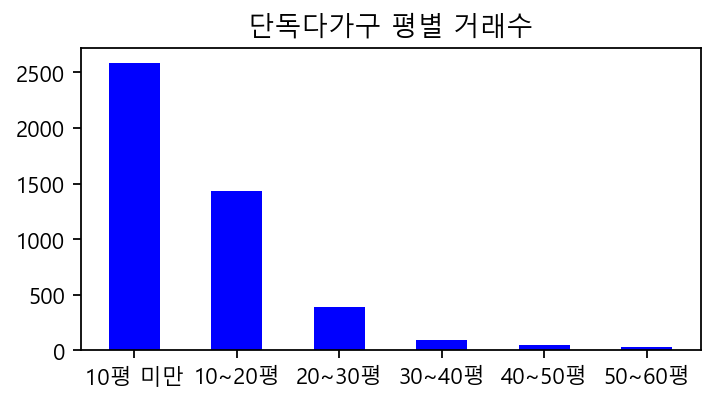

In [120]:
up=danta_jeon.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='단독다가구 평별 거래수'
plt.title(a)
plt.savefig(a+'.png')

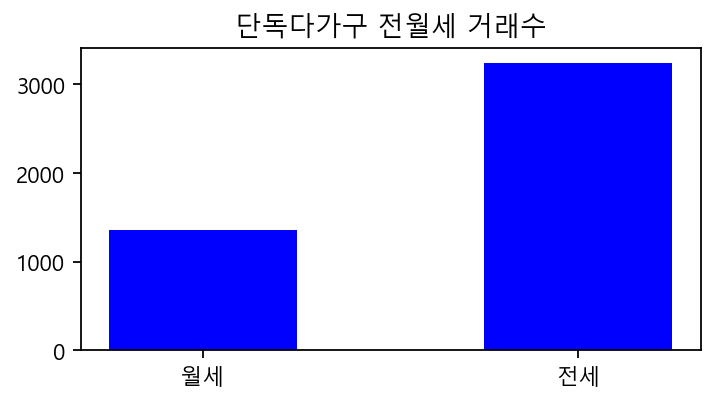

In [121]:
up=danta_jeon.groupby('전월세구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='단독다가구 전월세 거래수'
plt.title(a)
plt.savefig(a+'.png')

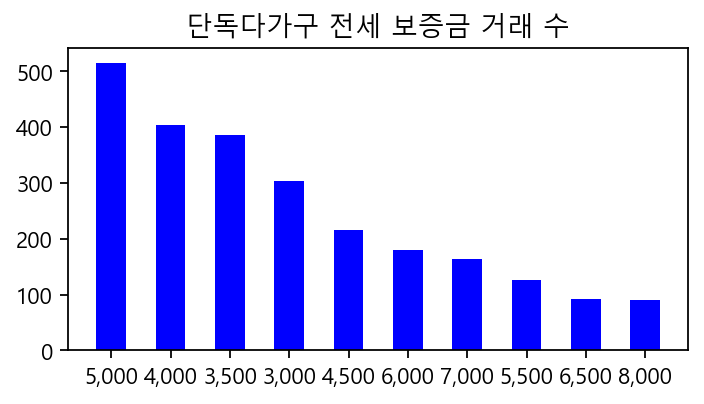

In [122]:
danta_jeon.groupby('보증금(만원)').count()
up=danta_jeon[danta_jeon['전월세구분']=='전세']
up=up.groupby('보증금(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='단독다가구 전세 보증금 거래 수'
plt.title(a)
plt.savefig(a+'.png')

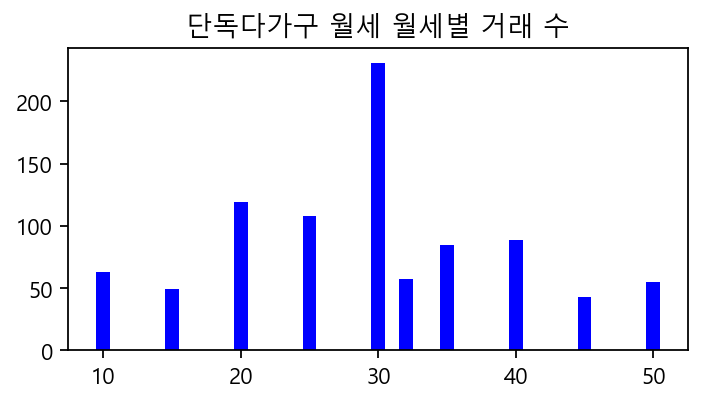

In [125]:
danta_jeon.groupby('월세(만원)').count()
up=danta_jeon[danta_jeon['전월세구분']=='월세']
up=up.groupby('월세(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=1,color="blue")
a='단독다가구 월세 월세별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
danta

In [ ]:
###단독주택은 안 먹히는 듯
danta_jeon2=danta_jeon[danta_jeon['전월세구분']=='전세']
all_danta2 = pd.merge(left=danta,right=danta_jeon2,how='left',on=["계약년월",'시군구','계약면적(㎡)'],sort=False)
idx_not=all_yata2[all_danta2['계약일_y'].isnull()].index
all_danta2_notnull=all_danta2.drop(idx_not)
all_danta2_notnull['보증금(만원)']=all_danta2_notnull['보증금(만원)'].apply(riri)
all_danta2_notnull['거래금액(만원)']=all_danta2_notnull['거래금액(만원)'].apply(riri)
all_danta2_notnull['전세가율']=(all_danta2_notnull['보증금(만원)']/all_danta2_notnull['거래금액(만원)'])*100
all_danta2_notnull.groupby('계약년월').mean()

### 오피스텔 전월세

In [126]:
oata_jeon = pd.read_csv('10.세종시_오피스텔(전월세)_실거래가.csv')
oata_jeon["평"]=oata_jeon["전용면적(㎡)"].apply(pyeong)

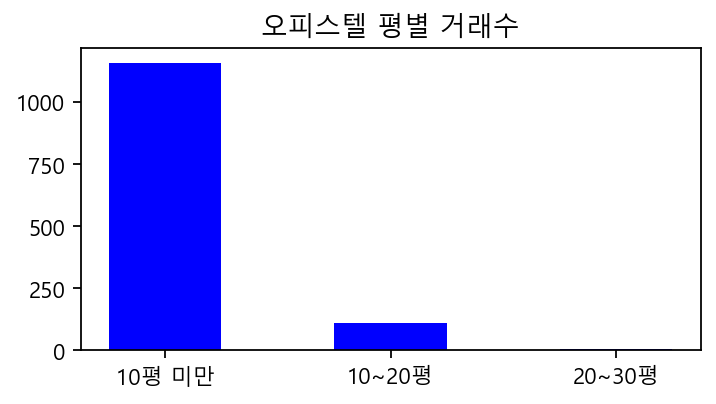

In [127]:
up=oata_jeon.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='오피스텔 평별 거래수'
plt.title(a)
plt.savefig(a+'.png')

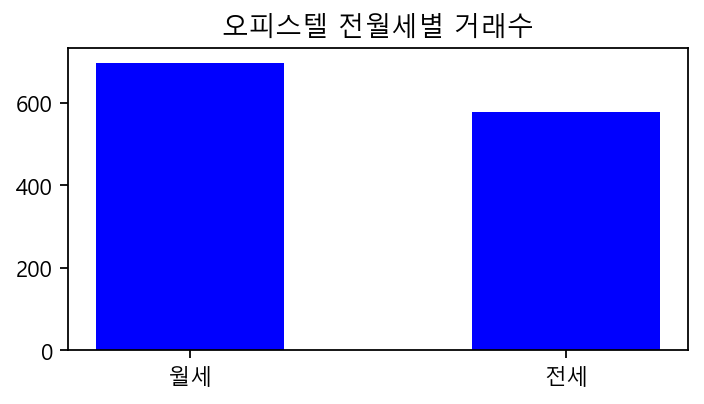

In [128]:
up=oata_jeon.groupby('전월세구분').count()
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='오피스텔 전월세별 거래수'
plt.title(a)
plt.savefig(a+'.png')

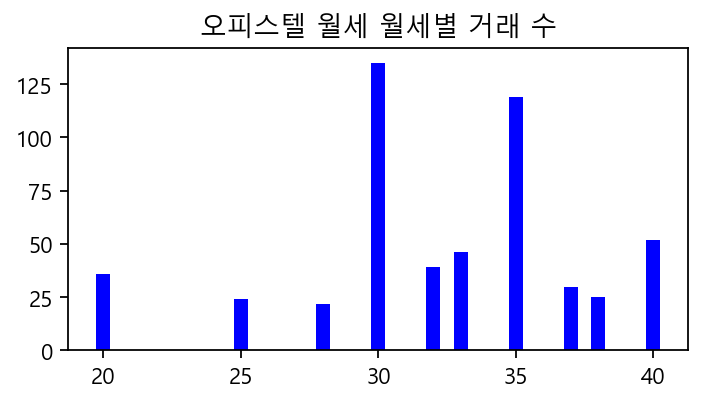

In [129]:
#oata_jeon.groupby('월세(만원)').count()
#danta_jeon.groupby('월세(만원)').count()
up=oata_jeon[oata_jeon['전월세구분']=='월세']
up=up.groupby('월세(만원)').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='오피스텔 월세 월세별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
###오피스텔 전세가율
oata_jeon2=oata_jeon[oata_jeon['전월세구분']=='전세']
all_oata2 = pd.merge(left=oata,right=oata_jeon2,how='left',on=["계약년월",'시군구','전용면적(㎡)','단지명'],sort=False)
idx_not=all_oata2[all_oata2['계약일_y'].isnull()].index
all_oata2_notnull=all_oata2.drop(idx_not)
all_oata2_notnull['보증금(만원)']=all_oata2_notnull['보증금(만원)'].apply(riri)
all_oata2_notnull['거래금액(만원)']=all_oata2_notnull['거래금액(만원)'].apply(riri)
all_oata2_notnull['전세가율']=(all_oata2_notnull['보증금(만원)']/all_oata2_notnull['거래금액(만원)'])*100
all_oata2_notnull.groupby('계약년월').mean()

In [ ]:
### 전월세 총합

In [130]:
data_jeon_all = pd.concat([data_jeon,yata_jeon,danta_jeon,oata_jeon], ignore_index=True)
data_jeon_all

,계약년월,계약일,시군구,본번,부번,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,평,건물명,도로조건,계약면적(㎡)
0,201702,4,세종특별자치시 고운동,1396,0.0,가락마을 20단지(호반베르디움5차),월세,84.9895,"10,000",30,13.0,2015.0,20~30평,NaN,NaN,NaN
1,201702,28,세종특별자치시 고운동,1396,0.0,가락마을 20단지(호반베르디움5차),월세,59.8338,"4,000",38,7.0,2015.0,10~20평,NaN,NaN,NaN
2,201706,19,세종특별자치시 고운동,1396,0.0,가락마을 20단지(호반베르디움5차),월세,59.8338,"1,000",46,17.0,2015.0,10~20평,NaN,NaN,NaN
3,201706,21,세종특별자치시 고운동,1396,0.0,가락마을 20단지(호반베르디움5차),월세,59.9897,"1,000",40,2.0,2015.0,10~20평,NaN,NaN,NaN
4,201707,11,세종특별자치시 고운동,1396,0.0,가락마을 20단지(호반베르디움5차),월세,84.9895,"1,000",50,10.0,2015.0,20~30평,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18257,202012,9,세종특별자치시 나성동,756,0.0,리치먼드시티세종,전세,26.1800,"14,000",0,6.0,2020.0,10평 미만,NaN,NaN,NaN
18258,202012,16,세종특별자치시 나성동,756,0.0,리치먼드시티세종,월세,32.5000,"1,000",65,4.0,2020.0,10평 미만,NaN,NaN,NaN
18259,202012,18,세종특별자치시 도담동,246,5.0,세종한신휴시티,전세,24.0300,"9,000",0,4.0,2014.0,10평 미만,NaN,NaN,NaN
18260,202012,28,세종특별자치시 나성동,756,0.0,리치먼드시티세종,전세,26.1800,"16,000",0,8.0,2020.0,10평 미만,NaN,NaN,NaN


In [132]:
data_jeon_all['계약년월']=data_jeon_all['계약년월'].astype(str)
data_jeon_all['계약월']=data_jeon_all['계약년월'].apply(mon)

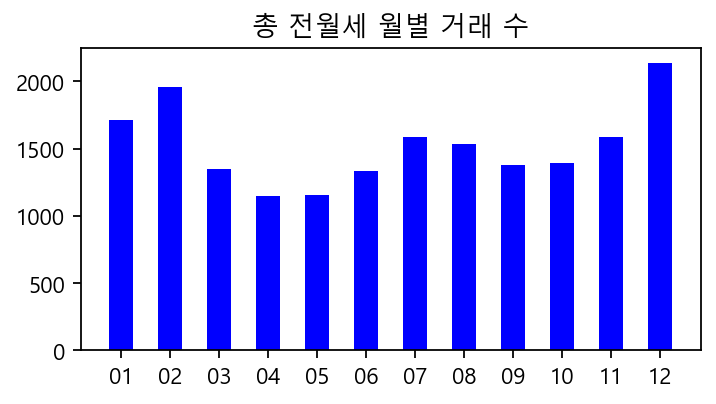

In [133]:
up=data_jeon_all.groupby('계약월').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='총 전월세 월별 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [134]:
data_jeon_all['계약년']=data_jeon_all['계약년월'].apply(year)

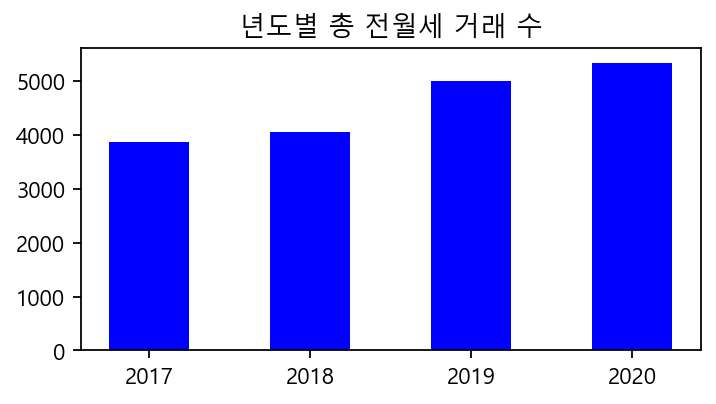

In [136]:
up=data_jeon_all.groupby('계약년').count()
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='년도별 총 전월세 거래 수'
plt.title(a)
plt.savefig(a+'.png')

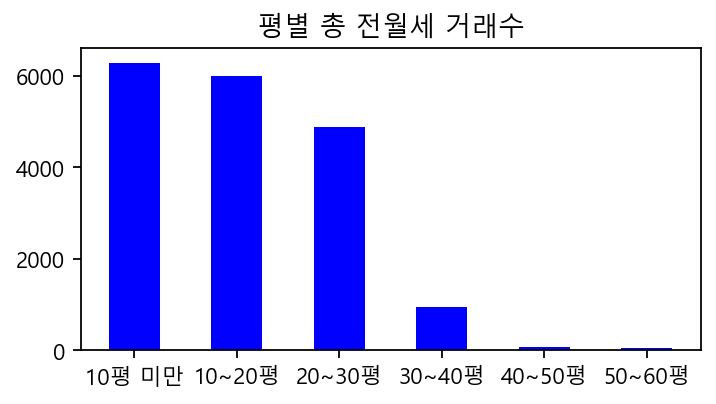

In [138]:
up=data_jeon_all.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 총 전월세 거래수'
plt.title(a)
plt.savefig(a+'.png')

In [139]:
data_jeon_all

,계약년월,계약일,시군구,본번,부번,단지명,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,건축년도,평,건물명,도로조건,계약면적(㎡),계약월,계약년
0,201702,4,세종특별자치시 고운동,1396,0.0,가락마을 20단지(호반베르디움5차),월세,84.9895,"10,000",30,13.0,2015.0,20~30평,NaN,NaN,NaN,02,2017
1,201702,28,세종특별자치시 고운동,1396,0.0,가락마을 20단지(호반베르디움5차),월세,59.8338,"4,000",38,7.0,2015.0,10~20평,NaN,NaN,NaN,02,2017
2,201706,19,세종특별자치시 고운동,1396,0.0,가락마을 20단지(호반베르디움5차),월세,59.8338,"1,000",46,17.0,2015.0,10~20평,NaN,NaN,NaN,06,2017
3,201706,21,세종특별자치시 고운동,1396,0.0,가락마을 20단지(호반베르디움5차),월세,59.9897,"1,000",40,2.0,2015.0,10~20평,NaN,NaN,NaN,06,2017
4,201707,11,세종특별자치시 고운동,1396,0.0,가락마을 20단지(호반베르디움5차),월세,84.9895,"1,000",50,10.0,2015.0,20~30평,NaN,NaN,NaN,07,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18257,202012,9,세종특별자치시 나성동,756,0.0,리치먼드시티세종,전세,26.1800,"14,000",0,6.0,2020.0,10평 미만,NaN,NaN,NaN,12,2020
18258,202012,16,세종특별자치시 나성동,756,0.0,리치먼드시티세종,월세,32.5000,"1,000",65,4.0,2020.0,10평 미만,NaN,NaN,NaN,12,2020
18259,202012,18,세종특별자치시 도담동,246,5.0,세종한신휴시티,전세,24.0300,"9,000",0,4.0,2014.0,10평 미만,NaN,NaN,NaN,12,2020
18260,202012,28,세종특별자치시 나성동,756,0.0,리치먼드시티세종,전세,26.1800,"16,000",0,8.0,2020.0,10평 미만,NaN,NaN,NaN,12,2020


### 토지매매 실거래

In [ ]:
def pyeong2(df):
    return int(df/3.3)

In [ ]:
tata = pd.read_csv('12.세종시_토지(매매)_실거래가.csv')
tata["평"]=tata["계약면적(㎡)"].apply(pyeong2)
tata

In [ ]:
up=tata.groupby('지목').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(8,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='지목별 토지 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=tata.groupby('용도지역').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(16,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='용도지역별 토지 거래 수'
plt.title(a)
plt.savefig(a+'.png')

In [ ]:
up=tata.groupby('평').count()
up=up.sort_values(by='계약년월',ascending=False)[:10]
x=up.index
y=up['계약년월']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 토지 거래 수'
plt.title(a)
plt.savefig(a+'.png')

### 분양권 실거래가

In [ ]:
bunta = pd.read_csv('13.세종시_분양권_실거래가.csv')
bunta["평"]=bunta["전용면적(㎡)"].apply(pyeong)

In [ ]:
bunta

In [ ]:
up=bunta.groupby('평').count()
up=up.reindex(index=['10평 미만','10~20평', '20~30평', '30~40평', '40~50평', '50~60평'])
x=up.index
y=up['계약일']
plt.figure(figsize=(5,2.5),dpi=160)
plt.bar(x,y,width=0.5,color="blue")
a='평별 분양권 거래수'
plt.title(a)
plt.savefig(a+'.png')